# Desafio final Code:Nation Data Science

***
## Objetivo

O objetivo deste produto é fornecer um serviço automatizado que recomenda leads para um usuário dado sua atual lista de clientes (Portfólio).
 
## Contextualização

Algumas empresas gostariam de saber quem são as demais empresas em um determinado mercado (população) que tem maior probabilidade se tornarem seus próximos clientes. Ou seja, a sua solução deve encontrar no mercado quem são os leads mais aderentes dado as características dos clientes presentes no portfólio do usuário.

Além disso, sua solução deve ser agnóstica ao usuário. Qualquer usuário com uma lista de clientes que queira explorar esse mercado pode extrair valor do serviço.       

Para o desafio, deverão ser consideradas as seguintes bases:

* Mercado: Base com informações sobre as empresas do Mercado a ser considerado. 
* Portfolio 1: Ids dos clientes da empresa 1
* Portfolio 2: Ids dos clientes da empresa 2
* Portfolio 3: Ids dos clientes da empresa 3 

Obs: todas as empresas(ids) dos portfolios estão contidos no Mercado(base de população). 

Link para download das bases Mercado, Portfolio 1, Portfolio 2 e Portfolio 3 respectivamente: 

[https://drive.google.com/open?id=1y8-kGTMrsMi4q49x7LBYfu_iP2f0Xudi](https://drive.google.com/open?id=1y8-kGTMrsMi4q49x7LBYfu_iP2f0Xudi)

[https://drive.google.com/open?id=1hgBhk-S0jKCF-GYBz8eaaktvmkH9xI0b](https://drive.google.com/open?id=1hgBhk-S0jKCF-GYBz8eaaktvmkH9xI0b)

[https://drive.google.com/open?id=1bbSy_0C981TbenfQOAhaK6Q_-q-ppq1X](https://drive.google.com/open?id=1bbSy_0C981TbenfQOAhaK6Q_-q-ppq1X)

[https://drive.google.com/open?id=18VH0WhmF3iRLk_pVwcTclUn_AiZFGYTX](https://drive.google.com/open?id=18VH0WhmF3iRLk_pVwcTclUn_AiZFGYTX)

As bases de portfólio poderão ser utilizadas para testar a aderência da solução. Além disso, se a equipe desejar, poderá simular portfólios por meio de amostragens no mercado. 

## Requisitos técnicos obrigatórios

-  Utilizar técnicas de data science e machine learning para desenvolver o projeto;
-  Apresentar o desenvolvimento e outputs do modelo em um Jupyter Notebook ou outra tecnologia de apresentação de Output de modelos de Machine Learning;
-  A análise deve considerar os seguintes pontos: análise exploratória dos dados, tratamento dos dados, avaliação de algoritmos, treinamento do modelo, avaliação de performance do modelo e visualização dos resultados; 
-  Para a apresentação do projeto, o tempo entre o treinamento do modelo e o output deve ser menor que 20 min. 


***
# Análise Exploratória de dados:




>## Importação de pacotes:

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.core.pylabtools import figsize

***
>## Leitura dos arquivos:

In [ ]:
market = pd.read_csv("https://diegoabreu.com/Uploads/Datasets/CN-files/estaticos_market.csv")
portfolio_1 = pd.read_csv("https://diegoabreu.com/Uploads/Datasets/CN-files/estaticos_portfolio1.csv")
portfolio_2 = pd.read_csv("https://diegoabreu.com/Uploads/Datasets/CN-files/estaticos_portfolio2.csv")
portfolio_3 = pd.read_csv("https://diegoabreu.com/Uploads/Datasets/CN-files/estaticos_portfolio3.csv")

***
> ## Shapes: Linhas x Colunas

In [ ]:
print("(linhas, colunas) do dataset market:", market.shape)
print("(linhas, colunas) do dataset portfólio 1:",portfolio_1.shape)
print("(linhas, colunas) do dataset portfólio 2:",portfolio_2.shape)
print("(linhas, colunas) do dataset portfólio 3:",portfolio_3.shape)

(linhas, colunas) do dataset market: (462298, 182)
(linhas, colunas) do dataset portfólio 1: (555, 182)
(linhas, colunas) do dataset portfólio 2: (566, 2)
(linhas, colunas) do dataset portfólio 3: (265, 2)


***
> ## Visualização dos heads:

>> ### Market:

In [ ]:
market.head()

Unnamed: 0  ... qt_filiais
0           0  ...          0
1           1  ...          0
2           2  ...          0
3           3  ...          0
4           4  ...          0

[5 rows x 182 columns]

***
>> ### Portfólio 1:

In [ ]:
portfolio_1.head()

Unnamed: 0  ... qt_filiais
0           0  ...          0
1           1  ...          4
2           2  ...          0
3           3  ...          0
4           4  ...          3

[5 rows x 182 columns]

***
>> ### Portfólio 2:

In [ ]:
portfolio_2.head()

Unnamed: 0                                                 id
0           0  09e95c1a84049001d086470a8f320a19b076f955a89122...
1           1  dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...
2           2  16843c9ffb920170477118933798510d8d5f00f5c56c12...
3           3  ff045934d90aab184dd15e66daf3b3c97193bda5449298...
4           4  a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...

***
>> ### Portfólio 3:

In [ ]:
portfolio_3.head()

Unnamed: 0                                                 id
0           0  bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...
1           1  16843c9ffb920170477118933798510d8d5f00f5c56c12...
2           2  1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...
3           3  3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...
4           4  c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...

***
> ## Explorando o Dataset Market:

>> ### Tipos de dados:

In [ ]:
tipos_de_dados_market = market.dtypes
tipos_de_dados_market 

Unnamed: 0                                         int64
id                                                object
fl_matriz                                           bool
de_natureza_juridica                              object
sg_uf                                             object
natureza_juridica_macro                           object
de_ramo                                           object
setor                                             object
idade_empresa_anos                               float64
idade_emp_cat                                     object
fl_me                                               bool
fl_sa                                               bool
fl_epp                                              bool
fl_mei                                              bool
fl_ltda                                             bool
dt_situacao                                       object
fl_st_especial                                      bool
fl_email                       

***
>> ### Quantidade de colunas com NA's:

In [ ]:
qtd_cols_com_na_market = len(market.columns[market.isna().any()])
qtd_cols_com_na_market

163

***
>> ### Quantidade de colunas sem NA's:

In [ ]:
qtd_cols_sem_na_market = len(market.columns) - qtd_cols_com_na_market
qtd_cols_sem_na_market

19

***
>>  ### Contagem de NA's por coluna:

In [ ]:
qtd_na_por_col_market = market.isna().sum().sort_values(ascending=False)
qtd_na_por_col_market

qt_alteracao_socio_180d              462298
grau_instrucao_macro_desconhecido    462298
qt_alteracao_socio_90d               462298
qt_alteracao_socio_365d              462298
qt_alteracao_socio_total             462298
coligada_mais_nova_baixada           462162
coligada_mais_antiga_baixada         462162
idade_media_coligadas_baixadas       462162
vl_total_veiculos_antt               462122
vl_total_tancagem                    462018
vl_total_veiculos_antt_grupo         461962
vl_total_tancagem_grupo              460538
grau_instrucao_macro_analfabeto      460414
idade_ate_18                         459392
qt_socios_st_suspensa                459047
vl_potenc_cons_oleo_gas              458615
qt_socios_pj_suspensos               457754
vl_idade_minima_socios_pj            457754
qt_socios_pj_inaptos                 457754
vl_idade_maxima_socios_pj            457754
qt_socios_pj_baixados                457754
vl_idade_media_socios_pj             457754
qt_socios_pj_nulos              

***
>> ### Datframe market sem as colunas com NA's:

In [ ]:
market_T1 = market.dropna(axis = 'columns')
market_T1 = market_T1.drop(['Unnamed: 0'], axis = 1) # Exclui a coluna 'Unnamed: 0' que é irrelevante pois possui valor igual ao index.
market_T1.head()

id  ...  qt_filiais
0  a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...  ...           0
1  6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...  ...           0
2  4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...  ...           0
3  3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...  ...           0
4  1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...  ...           0

[5 rows x 18 columns]

In [ ]:
print("Após esse primeiro tratamento, as dimensões (linha, coluna) de market são:", market_T1.shape)

Após esse primeiro tratamento, as dimensões (linha, coluna) de market são: (462298, 18)


***
>> ### Valores únicos:

In [ ]:
# Primeiro um ajuste na coluna 'idade_empresa_anos' que está como float:
market_T1['idade_empresa_anos'] = market_T1['idade_empresa_anos'].round().astype(int)

qtd_val_uni_market_T1 = market_T1.nunique()
tipos_de_dados_market_T1 = market_T1.dtypes
market_T1_qtd_un_tp = pd.concat([qtd_val_uni_market_T1, tipos_de_dados_market_T1], axis = 1).reset_index()
market_T1_qtd_un_tp.columns = ['Coluna', 'Valores unicos', 'Tipo']
market_T1_qtd_un_tp

Coluna  Valores unicos    Tipo
0                        id          462298  object
1                 fl_matriz               2    bool
2      de_natureza_juridica              67  object
3                     sg_uf               6  object
4   natureza_juridica_macro               7  object
5                   de_ramo              33  object
6        idade_empresa_anos              71   int64
7             idade_emp_cat               6  object
8                     fl_me               2    bool
9                     fl_sa               2    bool
10                   fl_epp               1    bool
11                   fl_mei               2    bool
12                  fl_ltda               2    bool
13           fl_st_especial               2    bool
14                 fl_email               2    bool
15              fl_telefone               2    bool
16                    fl_rm               2  object
17               qt_filiais             304   int64

>> ### Frequência dos valores únicos:

In [ ]:
freq_val_uni_market_T1 = market_T1.drop(['id'], axis =1).apply(lambda x: [x.value_counts().to_dict()])
freq_val_uni_market_T1

fl_matriz                                     [{True: 433232, False: 29066}]
de_natureza_juridica       [{'EMPRESARIO INDIVIDUAL': 295756, 'SOCIEDADE ...
sg_uf                      [{'MA': 127654, 'RN': 98837, 'AM': 82114, 'PI'...
natureza_juridica_macro    [{'OUTROS': 320211, 'ENTIDADES EMPRESARIAIS': ...
de_ramo                    [{'COMERCIO VAREJISTA': 172404, 'SERVICOS DIVE...
idade_empresa_anos         [{1: 43140, 2: 37293, 3: 36525, 4: 29967, 5: 2...
idade_emp_cat              [{'1 a 5': 138580, '5 a 10': 116100, '> 20': 7...
fl_me                                          [{False: 461083, True: 1215}]
fl_sa                                          [{False: 453866, True: 8432}]
fl_epp                                                     [{False: 462298}]
fl_mei                                       [{False: 311398, True: 150900}]
fl_ltda                                        [{False: 461056, True: 1242}]
fl_st_especial                                   [{False: 462230, True: 68}]

***
>> ### Visualização dos dados:

>> ### Gráficos:

In [ ]:
sns.set()

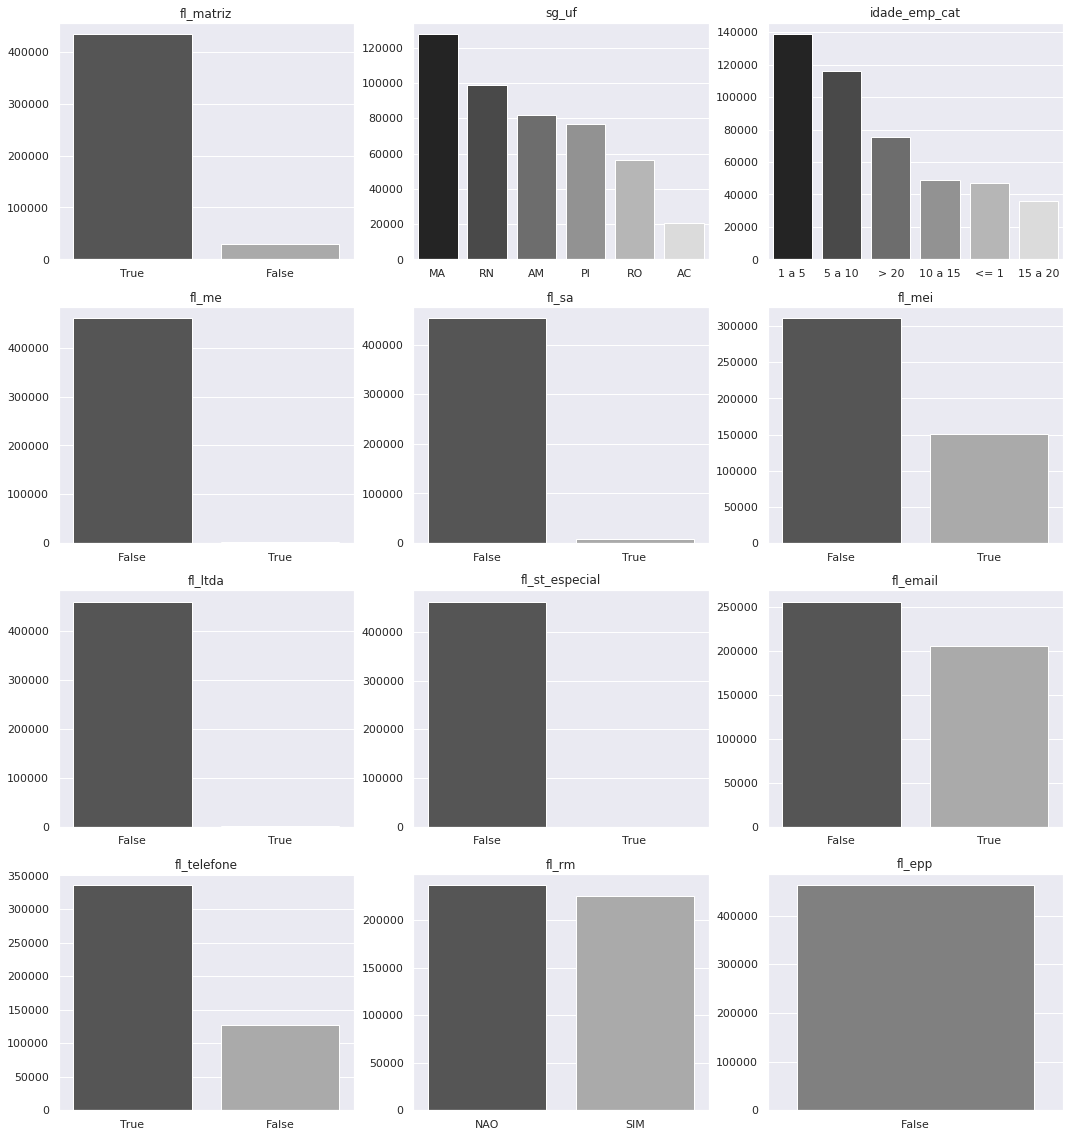

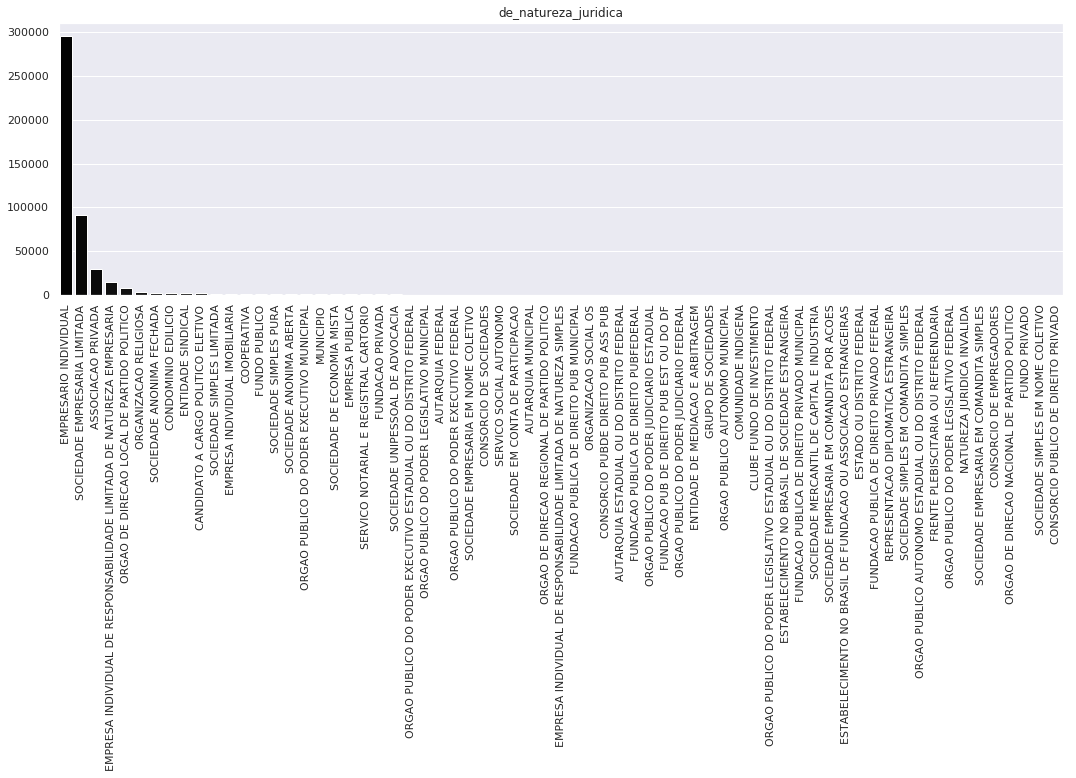

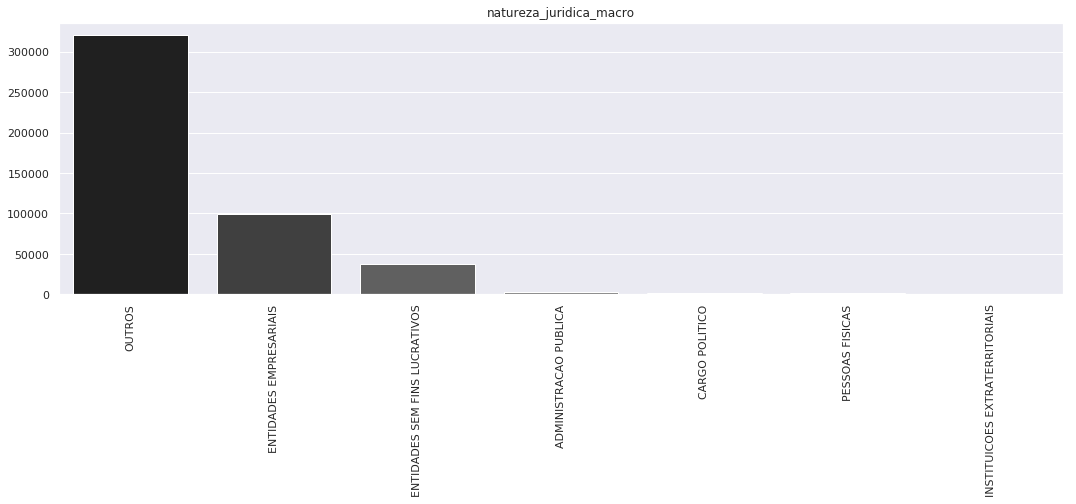

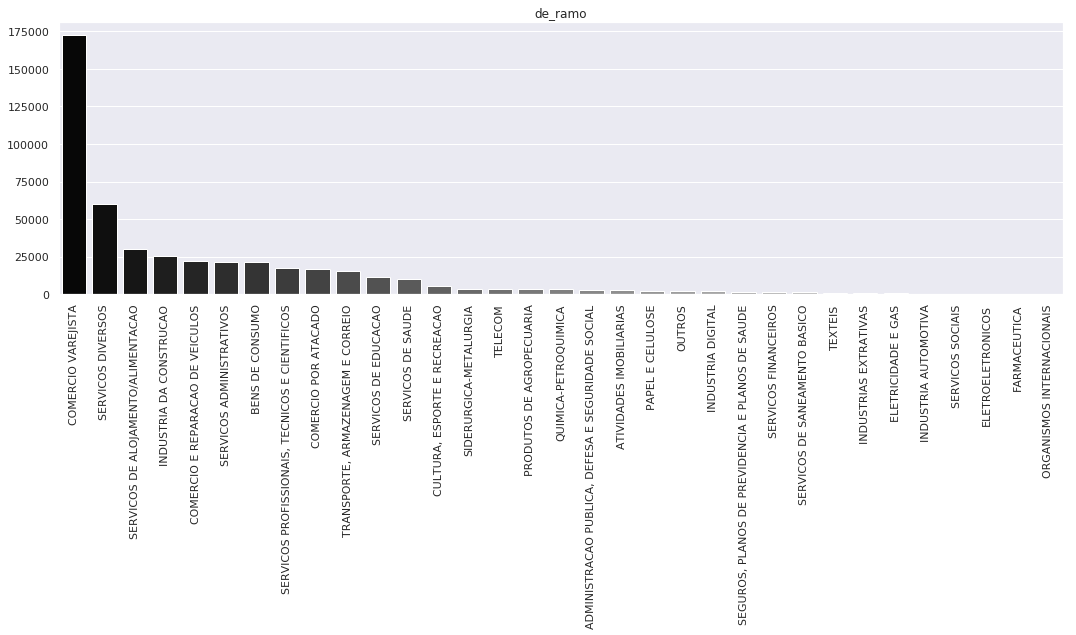

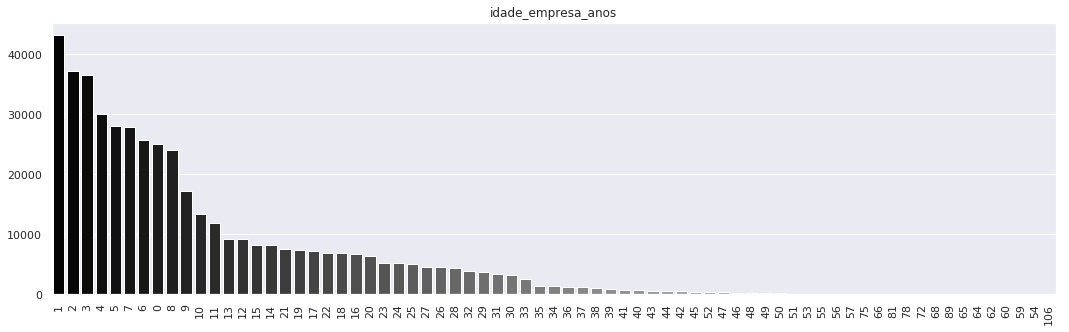

In [ ]:
f, axes= plt.subplots(4, 3, figsize=(18, 20))

sns.countplot(data=market_T1, x="fl_matriz", palette = 'gist_gray', order = market_T1['fl_matriz'].value_counts().index, ax=axes[0,0]);
axes[0,0].set_title("fl_matriz")
axes[0,0].set_ylabel("")
axes[0,0].set_xlabel("")

sns.countplot(data=market_T1, x="sg_uf", palette = 'gist_gray', order = market_T1['sg_uf'].value_counts().index, ax=axes[0,1]);
axes[0,1].set_title("sg_uf")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")

sns.countplot(data=market_T1, x="idade_emp_cat", palette = 'gist_gray', order = market_T1['idade_emp_cat'].value_counts().index, ax=axes[0,2]);
axes[0,2].set_title("idade_emp_cat")
axes[0,2].set_ylabel("")
axes[0,2].set_xlabel("")

sns.countplot(data=market_T1, x="fl_me", palette = 'gist_gray', order = market_T1['fl_me'].value_counts().index, ax=axes[1,0]);
axes[1,0].set_title("fl_me")
axes[1,0].set_ylabel("")
axes[1,0].set_xlabel("")

sns.countplot(data=market_T1, x="fl_sa", palette = 'gist_gray', order = market_T1['fl_sa'].value_counts().index, ax=axes[1,1]);
axes[1,1].set_title("fl_sa")
axes[1,1].set_ylabel("")
axes[1,1].set_xlabel("")

sns.countplot(data=market_T1, x="fl_mei", palette = 'gist_gray', order = market_T1['fl_mei'].value_counts().index, ax=axes[1,2]);
axes[1,2].set_title("fl_mei")
axes[1,2].set_ylabel("")
axes[1,2].set_xlabel("")

sns.countplot(data=market_T1, x="fl_ltda", palette = 'gist_gray', order = market_T1['fl_ltda'].value_counts().index, ax=axes[2,0]);
axes[2,0].set_title("fl_ltda")
axes[2,0].set_ylabel("")
axes[2,0].set_xlabel("")

sns.countplot(data=market_T1, x="fl_st_especial", palette = 'gist_gray', order = market_T1['fl_st_especial'].value_counts().index, ax=axes[2,1]);
axes[2,1].set_title("fl_st_especial")
axes[2,1].set_ylabel("")
axes[2,1].set_xlabel("")

sns.countplot(data=market_T1, x="fl_email", palette = 'gist_gray', order = market_T1['fl_email'].value_counts().index, ax=axes[2,2]);
axes[2,2].set_title("fl_email")
axes[2,2].set_ylabel("")
axes[2,2].set_xlabel("")

sns.countplot(data=market_T1, x="fl_telefone", palette = 'gist_gray', order = market_T1['fl_telefone'].value_counts().index, ax=axes[3,0]);
axes[3,0].set_title("fl_telefone")
axes[3,0].set_ylabel("")
axes[3,0].set_xlabel("")

sns.countplot(data=market_T1, x="fl_rm", palette = 'gist_gray', order = market_T1['fl_rm'].value_counts().index, ax=axes[3,1]);
axes[3,1].set_title("fl_rm")
axes[3,1].set_ylabel("")
axes[3,1].set_xlabel("")

sns.countplot(data=market_T1, x="fl_epp", palette = 'gist_gray', order = market_T1['fl_epp'].value_counts().index, ax=axes[3,2]);
axes[3,2].set_title("fl_epp")
axes[3,2].set_ylabel("")
axes[3,2].set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=market_T1, x="de_natureza_juridica", palette = 'gist_gray', order = market_T1['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=market_T1, x="natureza_juridica_macro", palette = 'gist_gray', order = market_T1['natureza_juridica_macro'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("natureza_juridica_macro")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=market_T1, x="de_ramo", palette = 'gist_gray', order = market_T1['de_ramo'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_ramo")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=market_T1, x="idade_empresa_anos", palette = 'gist_gray', order = market_T1['idade_empresa_anos'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("idade_empresa_anos")
ax.set_ylabel("")
ax.set_xlabel("")

plt.show()

***
>> ### Correlações:


In [ ]:
# Converter colunas object para valor numérico 
market_T1['de_natureza_juridica'] = pd.factorize(market_T1['de_natureza_juridica'])[0]
market_T1['sg_uf'] = pd.factorize(market_T1['sg_uf'])[0]
market_T1['natureza_juridica_macro'] = pd.factorize(market_T1['natureza_juridica_macro'])[0]
market_T1['de_ramo'] = pd.factorize(market_T1['de_ramo'])[0]
market_T1['idade_emp_cat'] = pd.factorize(market_T1['idade_emp_cat'])[0]
market_T1['fl_rm'] = pd.factorize(market_T1['fl_rm'])[0]

In [ ]:
correlacao = market_T1.corr(method="pearson")
correlacao

fl_matriz  de_natureza_juridica  ...     fl_rm  qt_filiais
fl_matriz                 1.000000             -0.139675  ...  0.002995   -0.236179
de_natureza_juridica     -0.139675              1.000000  ...  0.041568    0.206322
sg_uf                     0.003383              0.019214  ...  0.261945   -0.000338
natureza_juridica_macro   0.172292              0.340687  ...  0.099733   -0.030402
de_ramo                  -0.059943              0.021511  ...  0.011484    0.007932
idade_empresa_anos       -0.066308              0.047197  ...  0.013730    0.057729
idade_emp_cat            -0.002898              0.019167  ... -0.012217    0.009109
fl_me                    -0.000106             -0.000029  ...  0.000989   -0.002891
fl_sa                    -0.142037              0.123846  ...  0.013625    0.157601
fl_epp                         NaN                   NaN  ...       NaN         NaN
fl_mei                    0.180082             -0.186859  ... -0.029613   -0.042687
fl_ltda                  -0.020816              0.087557  ... -0.019239   -0.002886
fl_st_especial            0.003142              0.002509  ...  0.002202   -0.000698
fl_email                 -0.009068              0.025625  ... -0.112378    0.008246
fl_telefone               0.062251             -0.024119  ... -0.019218    0.003295
fl_rm                     0.002995              0.041568  ...  1.000000    0.013913
qt_filiais               -0.236179              0.206322  ...  0.013913    1.000000

[17 rows x 17 columns]

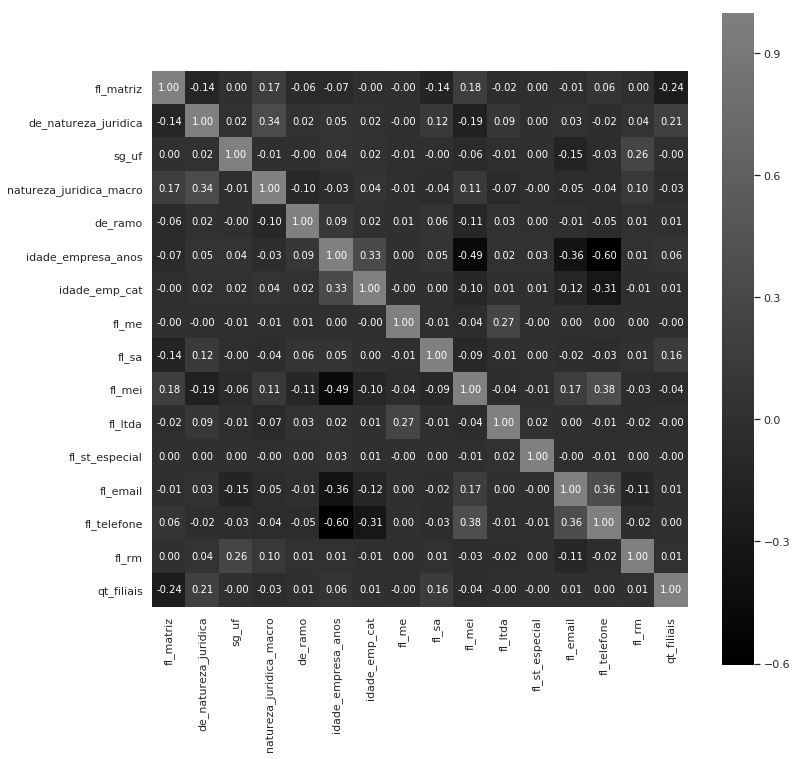

In [ ]:
cor_market_T1 = market_T1.drop(['fl_epp'], axis = 1)
correlacao = cor_market_T1.corr(method="pearson")
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(correlacao, center=True, square=True, annot=True, cmap="gist_gray",fmt='.2f', 
                 annot_kws={'size': 10});

> ## Explorando o Dataset Portfólio 1:

>> ### Tipos de dados:

In [ ]:
tipos_de_dados_portfolio_1 = portfolio_1.dtypes
tipos_de_dados_portfolio_1 

Unnamed: 0                                         int64
id                                                object
fl_matriz                                           bool
de_natureza_juridica                              object
sg_uf                                             object
natureza_juridica_macro                           object
de_ramo                                           object
setor                                             object
idade_empresa_anos                               float64
idade_emp_cat                                     object
fl_me                                               bool
fl_sa                                               bool
fl_epp                                              bool
fl_mei                                              bool
fl_ltda                                             bool
dt_situacao                                       object
fl_st_especial                                      bool
fl_email                       

>> ### Quantidade de colunas com NA's:

In [ ]:
qtd_cols_com_na_portfolio_1 = len(portfolio_1.columns[portfolio_1.isna().any()])
qtd_cols_com_na_portfolio_1

151

>> ### Quantidade de colunas sem NA's:

In [ ]:
qtd_cols_sem_na_portfolio_1 = len(portfolio_1.columns) - qtd_cols_com_na_portfolio_1
qtd_cols_sem_na_portfolio_1

31

>> ### Contagem de NA's por coluna:

In [ ]:
qtd_na_por_col_portfolio_1 = portfolio_1.isna().sum().sort_values(ascending=False)
qtd_na_por_col_portfolio_1

coligada_mais_antiga_baixada         555
coligada_mais_nova_baixada           555
vl_total_tancagem                    555
vl_total_veiculos_antt               555
idade_media_coligadas_baixadas       555
qt_alteracao_socio_365d              555
qt_alteracao_socio_180d              555
vl_total_tancagem_grupo              555
vl_total_veiculos_antt_grupo         555
grau_instrucao_macro_desconhecido    555
qt_alteracao_socio_90d               555
qt_alteracao_socio_total             555
grau_instrucao_macro_analfabeto      554
qt_socios_pj_inaptos                 553
qt_socios_pj_baixados                553
qt_socios_pj_suspensos               553
vl_idade_maxima_socios_pj            553
vl_idade_minima_socios_pj            553
qt_socios_pj_nulos                   553
vl_idade_media_socios_pj             553
qt_socios_pj_ativos                  553
vl_potenc_cons_oleo_gas              552
qt_socios_pep                        551
qt_art                               551
idade_ate_18    

>> ### Dataframe portfólio 1 sem as colunas com NA's:

In [ ]:
portfolio_1_T1 = portfolio_1.dropna(axis = 'columns')
portfolio_1_T1 = portfolio_1_T1.drop(['Unnamed: 0'], axis = 1) # Exclui a coluna 'Unnamed: 0' que é irrelevante pois possui valor igual ao index.
portfolio_1_T1.head()

id  ...  qt_filiais
0  dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...  ...           0
1  32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...  ...           4
2  a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...  ...           0
3  6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...  ...           0
4  f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...  ...           3

[5 rows x 30 columns]

In [ ]:
print("Após esse primeiro tratamento, as dimensões (linha, coluna) de market são:", portfolio_1_T1.shape)

Após esse primeiro tratamento, as dimensões (linha, coluna) de market são: (555, 30)


>> ### Valores únicos:

In [ ]:
# Primeiro um ajuste na coluna 'idade_empresa_anos' que está como float:
portfolio_1_T1['idade_empresa_anos'] = portfolio_1_T1['idade_empresa_anos'].round().astype(int)

qtd_val_uni_portfolio_1_T1 = portfolio_1_T1.nunique()
tipos_de_dados_portfolio_1_T1 = portfolio_1_T1.dtypes
portfolio_1_T1_qtd_un_tp = pd.concat([qtd_val_uni_portfolio_1_T1, tipos_de_dados_portfolio_1_T1], axis = 1).reset_index()
portfolio_1_T1_qtd_un_tp.columns = ['Coluna', 'Valores unicos', 'Tipo']
portfolio_1_T1_qtd_un_tp

Coluna  Valores unicos    Tipo
0                                id             555  object
1                         fl_matriz               2    bool
2              de_natureza_juridica               6  object
3                             sg_uf               6  object
4           natureza_juridica_macro               2  object
5                           de_ramo               2  object
6                             setor               3  object
7                idade_empresa_anos              44   int64
8                     idade_emp_cat               6  object
9                             fl_me               2    bool
10                            fl_sa               2    bool
11                           fl_epp               1    bool
12                           fl_mei               2    bool
13                          fl_ltda               1    bool
14                      dt_situacao             416  object
15                   fl_st_especial               1    bool
16                         fl_email               2    bool
17                      fl_telefone               2    bool
18                            fl_rm               2  object
19                       nm_divisao               8  object
20                      nm_segmento               2  object
21                           fl_spa               1    bool
22                          fl_antt               2    bool
23                       fl_veiculo               2    bool
24  vl_total_veiculos_pesados_grupo               9   int64
25    vl_total_veiculos_leves_grupo              10   int64
26                     sg_uf_matriz               7  object
27             fl_simples_irregular               1    bool
28                  fl_passivel_iss               2    bool
29                       qt_filiais              15   int64

>> ### Frequência dos valores únicos:

In [ ]:
freq_val_uni_portfolio_1_T1 = portfolio_1_T1.drop(['id'], axis =1).apply(lambda x: [x.value_counts().to_dict()])
freq_val_uni_portfolio_1_T1

fl_matriz                                                   [{True: 519, False: 36}]
de_natureza_juridica               [{'EMPRESARIO INDIVIDUAL': 432, 'SOCIEDADE EMP...
sg_uf                              [{'MA': 157, 'RN': 116, 'PI': 103, 'AM': 94, '...
natureza_juridica_macro             [{'OUTROS': 447, 'ENTIDADES EMPRESARIAIS': 108}]
de_ramo                            [{'COMERCIO VAREJISTA': 496, 'BENS DE CONSUMO'...
setor                              [{'COMERCIO': 496, 'INDUSTRIA': 52, 'SERVIÇO':...
idade_empresa_anos                 [{1: 61, 2: 43, 5: 43, 3: 35, 4: 35, 8: 33, 7:...
idade_emp_cat                      [{'1 a 5': 157, '5 a 10': 144, '> 20': 92, '<=...
fl_me                                                        [{False: 553, True: 2}]
fl_sa                                                        [{False: 546, True: 9}]
fl_epp                                                                [{False: 555}]
fl_mei                                                     [{Fals

>> ### Visualização dos dados:

>> ### Gráficos:

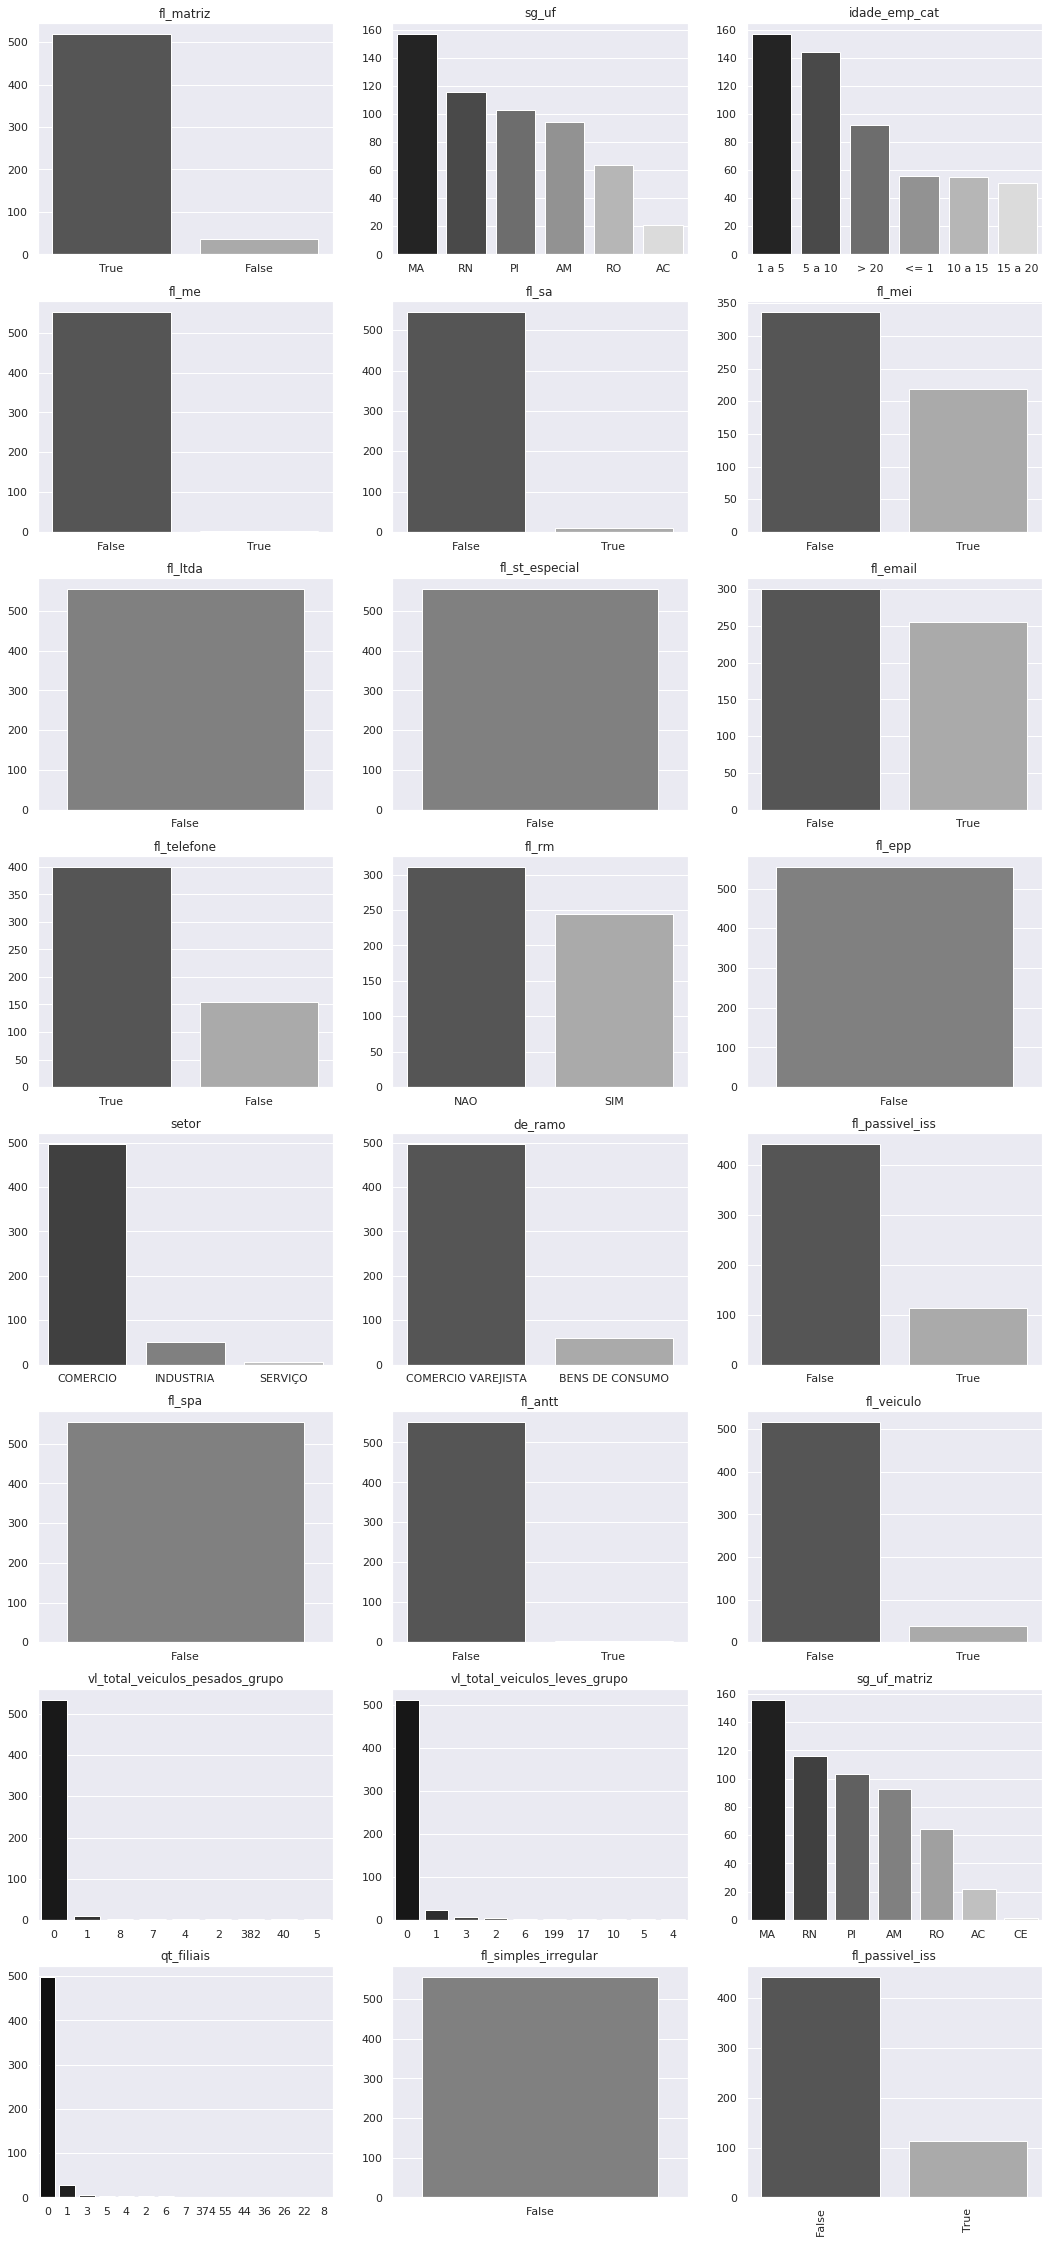

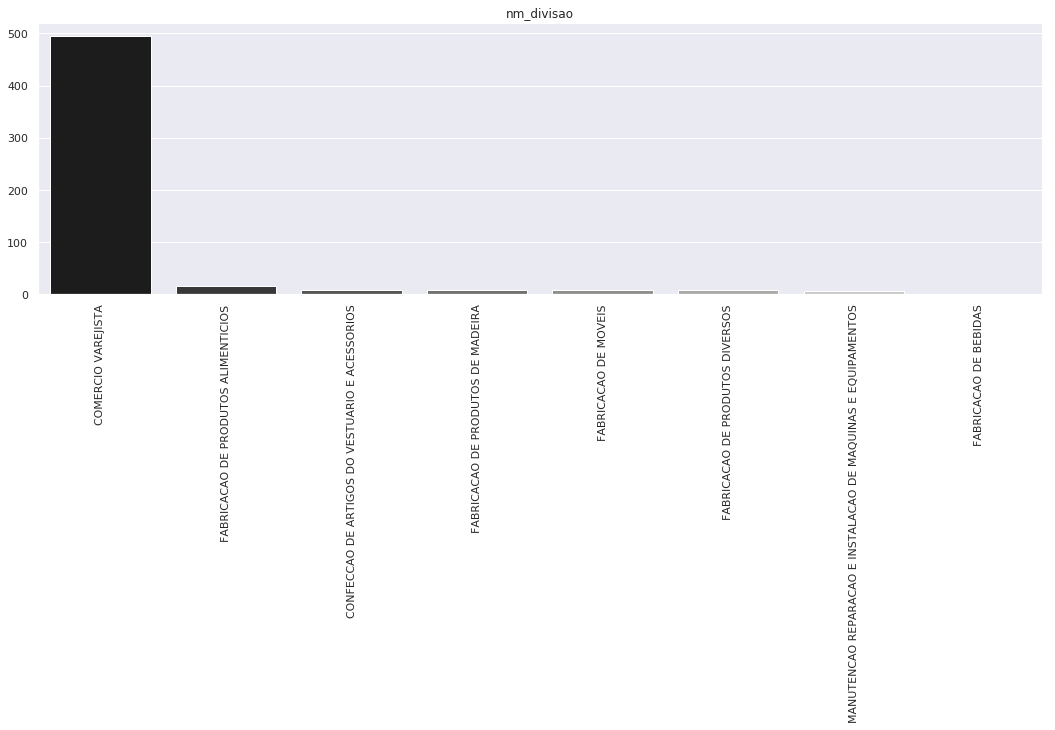

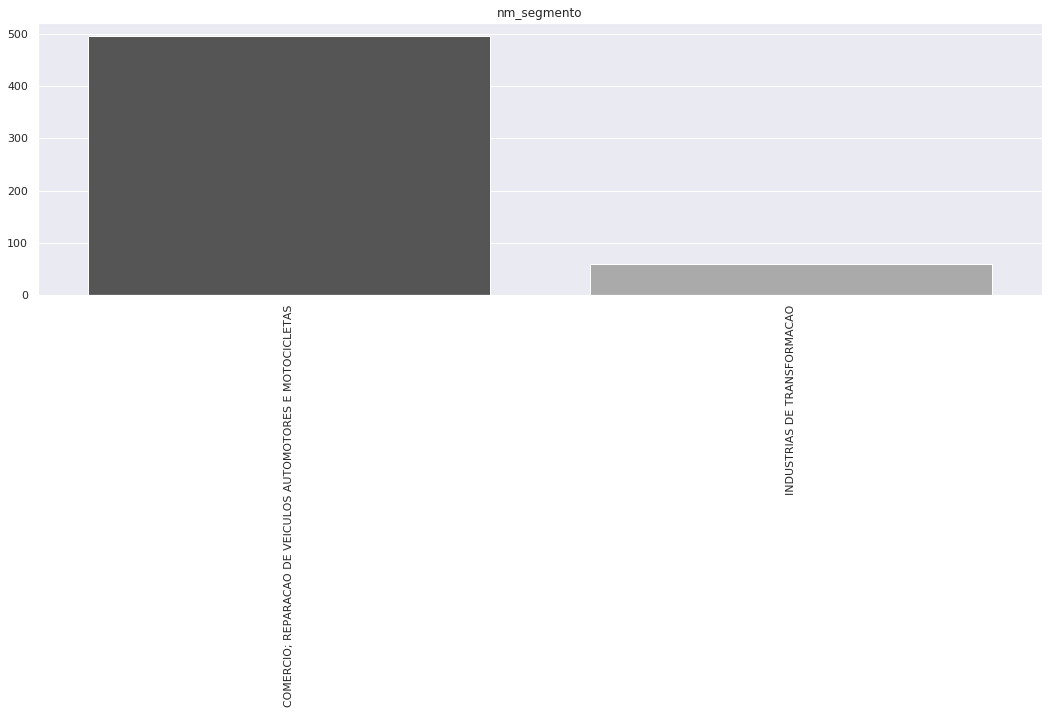

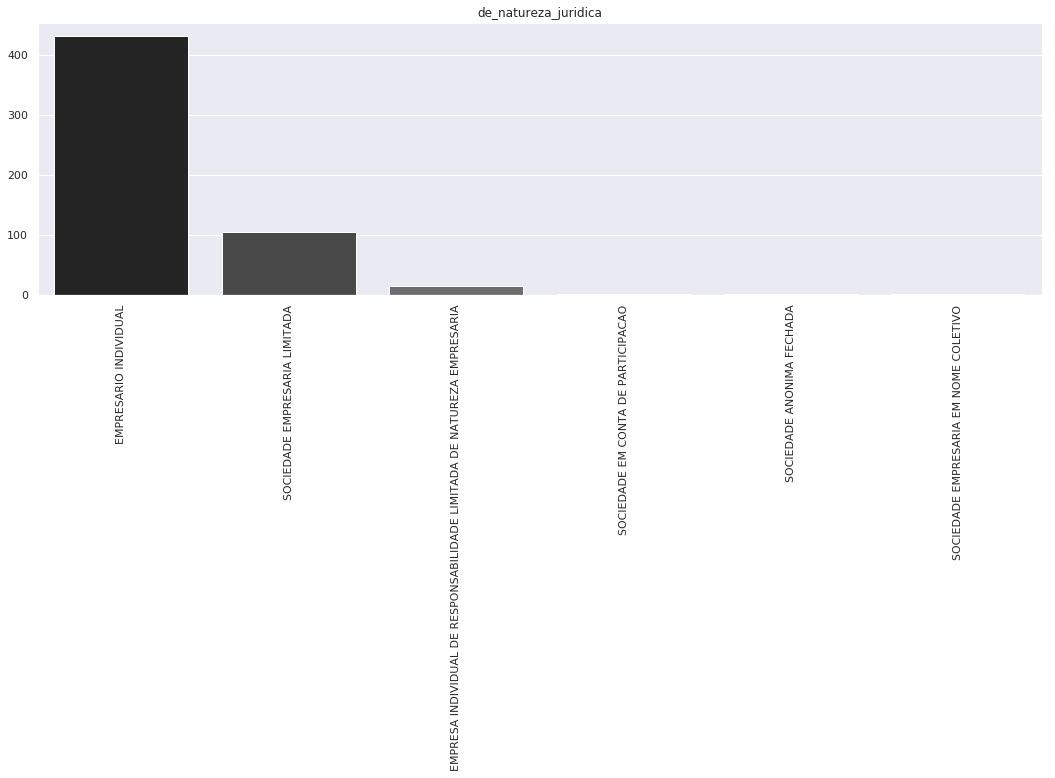

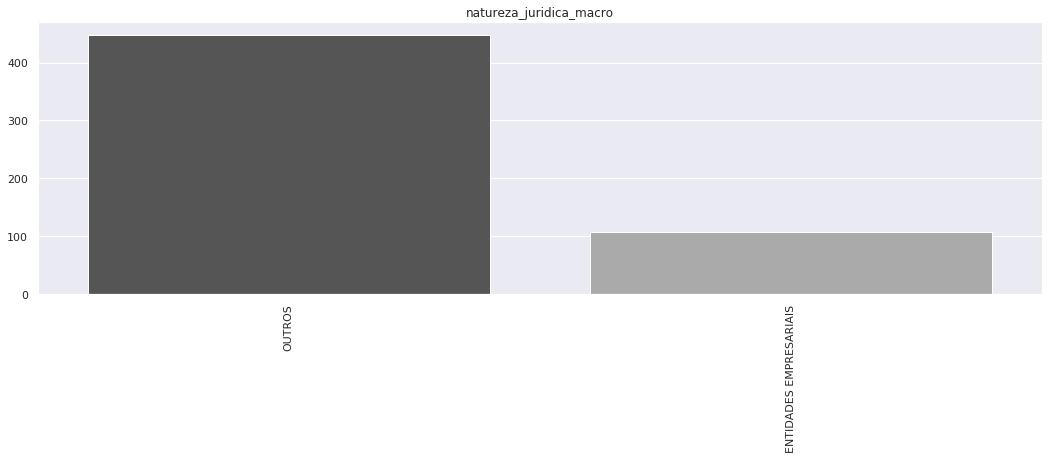

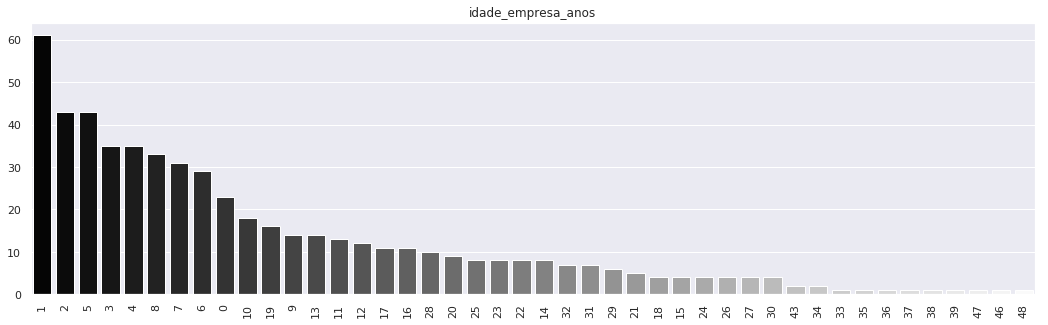

In [ ]:
f, axes= plt.subplots(8, 3, figsize=(18, 40))

sns.countplot(data=portfolio_1_T1, x="fl_matriz", palette = 'gist_gray', order = portfolio_1_T1['fl_matriz'].value_counts().index, ax=axes[0,0]);
axes[0,0].set_title("fl_matriz")
axes[0,0].set_ylabel("")
axes[0,0].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="sg_uf", palette = 'gist_gray', order = portfolio_1_T1['sg_uf'].value_counts().index, ax=axes[0,1]);
axes[0,1].set_title("sg_uf")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="idade_emp_cat", palette = 'gist_gray', order = portfolio_1_T1['idade_emp_cat'].value_counts().index, ax=axes[0,2]);
axes[0,2].set_title("idade_emp_cat")
axes[0,2].set_ylabel("")
axes[0,2].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="fl_me", palette = 'gist_gray', order = portfolio_1_T1['fl_me'].value_counts().index, ax=axes[1,0]);
axes[1,0].set_title("fl_me")
axes[1,0].set_ylabel("")
axes[1,0].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="fl_sa", palette = 'gist_gray', order = portfolio_1_T1['fl_sa'].value_counts().index, ax=axes[1,1]);
axes[1,1].set_title("fl_sa")
axes[1,1].set_ylabel("")
axes[1,1].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="fl_mei", palette = 'gist_gray', order = portfolio_1_T1['fl_mei'].value_counts().index, ax=axes[1,2]);
axes[1,2].set_title("fl_mei")
axes[1,2].set_ylabel("")
axes[1,2].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="fl_ltda", palette = 'gist_gray', order = portfolio_1_T1['fl_ltda'].value_counts().index, ax=axes[2,0]);
axes[2,0].set_title("fl_ltda")
axes[2,0].set_ylabel("")
axes[2,0].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="fl_st_especial", palette = 'gist_gray', order = portfolio_1_T1['fl_st_especial'].value_counts().index, ax=axes[2,1]);
axes[2,1].set_title("fl_st_especial")
axes[2,1].set_ylabel("")
axes[2,1].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="fl_email", palette = 'gist_gray', order = portfolio_1_T1['fl_email'].value_counts().index, ax=axes[2,2]);
axes[2,2].set_title("fl_email")
axes[2,2].set_ylabel("")
axes[2,2].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="fl_telefone", palette = 'gist_gray', order = portfolio_1_T1['fl_telefone'].value_counts().index, ax=axes[3,0]);
axes[3,0].set_title("fl_telefone")
axes[3,0].set_ylabel("")
axes[3,0].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="fl_rm", palette = 'gist_gray', order = portfolio_1_T1['fl_rm'].value_counts().index, ax=axes[3,1]);
axes[3,1].set_title("fl_rm")
axes[3,1].set_ylabel("")
axes[3,1].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="fl_epp", palette = 'gist_gray', order = portfolio_1_T1['fl_epp'].value_counts().index, ax=axes[3,2]);
axes[3,2].set_title("fl_epp")
axes[3,2].set_ylabel("")
axes[3,2].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="setor", palette = 'gist_gray', order = portfolio_1_T1['setor'].value_counts().index, ax=axes[4,0]);
axes[4,0].set_title("setor")
axes[4,0].set_ylabel("")
axes[4,0].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="de_ramo", palette = 'gist_gray', order = portfolio_1_T1['de_ramo'].value_counts().index, ax=axes[4,1]);
plt.xticks(rotation=90)
axes[4,1].set_title("de_ramo")
axes[4,1].set_ylabel("")
axes[4,1].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="fl_passivel_iss", palette = 'gist_gray', order = portfolio_1_T1['fl_passivel_iss'].value_counts().index, ax=axes[4,2]);
axes[4,2].set_title("fl_passivel_iss")
axes[4,2].set_ylabel("")
axes[4,2].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="fl_spa", palette = 'gist_gray', order = portfolio_1_T1['fl_spa'].value_counts().index, ax=axes[5,0]);
axes[5,0].set_title("fl_spa")
axes[5,0].set_ylabel("")
axes[5,0].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="fl_antt", palette = 'gist_gray', order = portfolio_1_T1['fl_antt'].value_counts().index, ax=axes[5,1]);
axes[5,1].set_title("fl_antt")
axes[5,1].set_ylabel("")
axes[5,1].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="fl_veiculo", palette = 'gist_gray', order = portfolio_1_T1['fl_veiculo'].value_counts().index, ax=axes[5,2]);
axes[5,2].set_title("fl_veiculo")
axes[5,2].set_ylabel("")
axes[5,2].set_xlabel("")


sns.countplot(data=portfolio_1_T1, x="vl_total_veiculos_pesados_grupo", palette = 'gist_gray', order = portfolio_1_T1['vl_total_veiculos_pesados_grupo'].value_counts().index, ax=axes[6,0]);
axes[6,0].set_title("vl_total_veiculos_pesados_grupo")
axes[6,0].set_ylabel("")
axes[6,0].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="vl_total_veiculos_leves_grupo", palette = 'gist_gray', order = portfolio_1_T1['vl_total_veiculos_leves_grupo'].value_counts().index, ax=axes[6,1]);
axes[6,1].set_title("vl_total_veiculos_leves_grupo")
axes[6,1].set_ylabel("")
axes[6,1].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="sg_uf_matriz", palette = 'gist_gray', order = portfolio_1_T1['sg_uf_matriz'].value_counts().index, ax=axes[6,2]);
axes[6,2].set_title("sg_uf_matriz")
axes[6,2].set_ylabel("")
axes[6,2].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="qt_filiais", palette = 'gist_gray', order = portfolio_1_T1['qt_filiais'].value_counts().index, ax=axes[7,0]);
axes[7,0].set_title("qt_filiais")
axes[7,0].set_ylabel("")
axes[7,0].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="fl_simples_irregular", palette = 'gist_gray', order = portfolio_1_T1['fl_simples_irregular'].value_counts().index, ax=axes[7,1]);
axes[7,1].set_title("fl_simples_irregular")
axes[7,1].set_ylabel("")
axes[7,1].set_xlabel("")

sns.countplot(data=portfolio_1_T1, x="fl_passivel_iss", palette = 'gist_gray', order = portfolio_1_T1['fl_passivel_iss'].value_counts().index, ax=axes[7,2]);
axes[7,2].set_title("fl_passivel_iss")
axes[7,2].set_ylabel("")
axes[7,2].set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_1_T1, x="nm_divisao", palette = 'gist_gray', order = portfolio_1_T1['nm_divisao'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_divisao")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_1_T1, x="nm_segmento", palette = 'gist_gray', order = portfolio_1_T1['nm_segmento'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_segmento")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_1_T1, x="de_natureza_juridica", palette = 'gist_gray', order = portfolio_1_T1['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_1_T1, x="natureza_juridica_macro", palette = 'gist_gray', order = portfolio_1_T1['natureza_juridica_macro'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("natureza_juridica_macro")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_1_T1, x="idade_empresa_anos", palette = 'gist_gray', order = portfolio_1_T1['idade_empresa_anos'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("idade_empresa_anos")
ax.set_ylabel("")
ax.set_xlabel("")

plt.show()

>> ### Correlações:

In [ ]:
# Converter colunas object para valor numérico 
portfolio_1_T1['de_natureza_juridica'] = pd.factorize(portfolio_1_T1['de_natureza_juridica'])[0]
portfolio_1_T1['sg_uf'] = pd.factorize(portfolio_1_T1['sg_uf'])[0]
portfolio_1_T1['natureza_juridica_macro'] = pd.factorize(portfolio_1_T1['natureza_juridica_macro'])[0]
portfolio_1_T1['de_ramo'] = pd.factorize(portfolio_1_T1['de_ramo'])[0]
portfolio_1_T1['setor'] = pd.factorize(portfolio_1_T1['setor'])[0]
portfolio_1_T1['idade_emp_cat'] = pd.factorize(portfolio_1_T1['idade_emp_cat'])[0]
portfolio_1_T1['dt_situacao'] = pd.factorize(portfolio_1_T1['dt_situacao'])[0]
portfolio_1_T1['fl_rm'] = pd.factorize(portfolio_1_T1['fl_rm'])[0]
portfolio_1_T1['nm_divisao'] = pd.factorize(portfolio_1_T1['nm_divisao'])[0]
portfolio_1_T1['nm_segmento'] = pd.factorize(portfolio_1_T1['nm_segmento'])[0]
portfolio_1_T1['sg_uf_matriz'] = pd.factorize(portfolio_1_T1['sg_uf_matriz'])[0]

In [ ]:
correlacao = portfolio_1_T1.corr(method="pearson")
correlacao

fl_matriz  ...  qt_filiais
fl_matriz                         1.000000  ...   -0.273559
de_natureza_juridica             -0.226851  ...    0.310853
sg_uf                             0.020505  ...   -0.063600
natureza_juridica_macro          -0.277094  ...    0.138582
de_ramo                           0.019630  ...   -0.022604
setor                             0.025994  ...   -0.021980
idade_empresa_anos               -0.038564  ...    0.012852
idade_emp_cat                    -0.051591  ...    0.073533
fl_me                            -0.106251  ...   -0.002720
fl_sa                            -0.024108  ...   -0.008875
fl_epp                                 NaN  ...         NaN
fl_mei                            0.211827  ...   -0.061090
fl_ltda                                NaN  ...         NaN
dt_situacao                      -0.009423  ...    0.000401
fl_st_especial                         NaN  ...         NaN
fl_email                          0.007935  ...    0.035284
fl_telefone                       0.080651  ...    0.025070
fl_rm                             0.041669  ...   -0.044078
nm_divisao                        0.017450  ...   -0.019818
nm_segmento                       0.019630  ...   -0.022604
fl_spa                                 NaN  ...         NaN
fl_antt                           0.022440  ...   -0.002545
fl_veiculo                        0.013466  ...   -0.004809
vl_total_veiculos_pesados_grupo  -0.192125  ...    0.984178
vl_total_veiculos_leves_grupo    -0.196777  ...    0.979017
sg_uf_matriz                     -0.010834  ...   -0.058635
fl_simples_irregular                   NaN  ...         NaN
fl_passivel_iss                  -0.012177  ...   -0.020532
qt_filiais                       -0.273559  ...    1.000000

[29 rows x 29 columns]

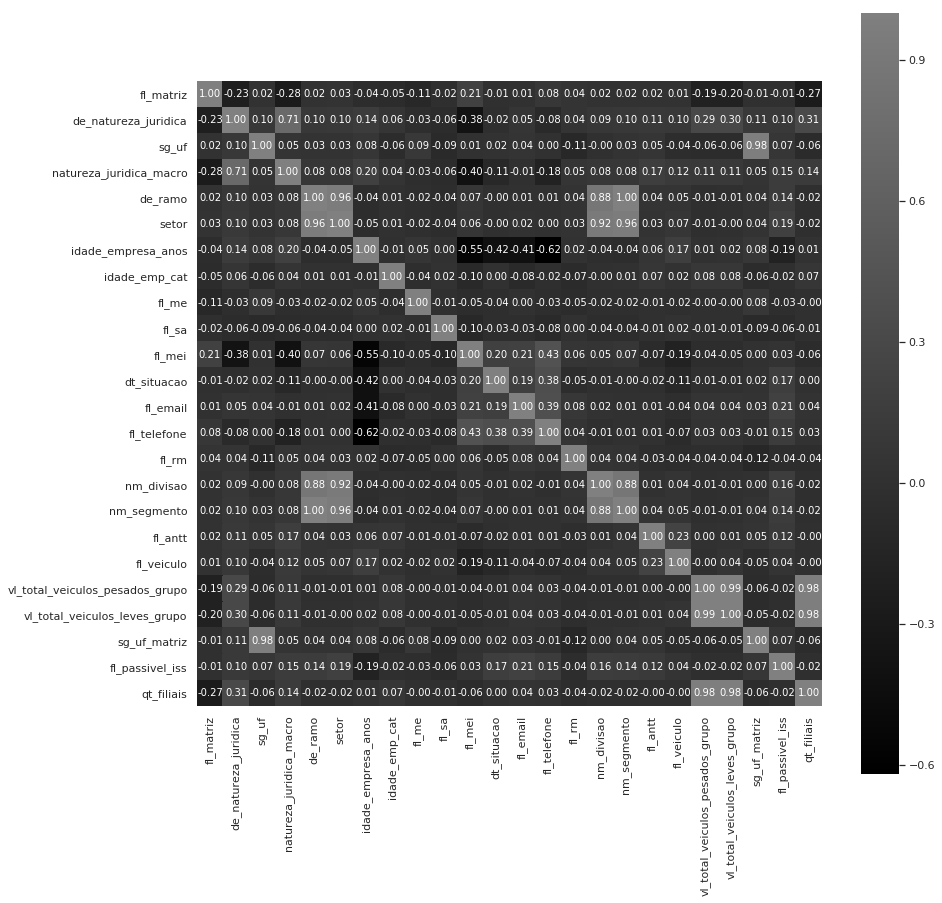

In [ ]:
cor_market_portfolio_1_T1 = portfolio_1_T1.drop(['fl_epp','fl_ltda','fl_st_especial', 'fl_spa', 'fl_simples_irregular'], axis = 1)
correlacao = cor_market_portfolio_1_T1.corr(method="pearson")
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(correlacao, center=True, square=True, annot=True, cmap="gist_gray",fmt='.2f', 
                 annot_kws={'size': 10});

>> ### Observações sobre o tipo de cliente da empresa 1:

- Os clientes disponibilizam pelo menos 30 dados (já contando com o id);
- Têm menos de 20 anos de mercado, sendo que a maioria possui menos de 10;
- A maioria é do setor de comércio, mas há de indústrias e serviços também;
- São do ramo do comércio varejista ou de bens de consumo;
- Atuam em reparação de veículos, fábricas variadas e indústria de transformação;
- Maioria são de natureza jurídica “Empresários individuais”;
- Os dados: fl_ltda, ff_st_especial, fl_epp, fl_spa e fl_simples_irregular sempre apresentam valor “False”.


> ## Explorando o Dataset Portfólio 2:

>> ### Tipos dos dados:

In [ ]:
# Esse portfólio só possui o id, então primeiro completamos o dataset com os demais dados.
portfolio_2_T1 = pd.DataFrame(portfolio_2['id'])
portfolio_2_T1 = pd.merge(portfolio_2_T1, market, on='id', how='left')

tipos_de_dados_portfolio_2_T1 = portfolio_2_T1.dtypes
tipos_de_dados_portfolio_2_T1

id                                                object
Unnamed: 0                                         int64
fl_matriz                                           bool
de_natureza_juridica                              object
sg_uf                                             object
natureza_juridica_macro                           object
de_ramo                                           object
setor                                             object
idade_empresa_anos                               float64
idade_emp_cat                                     object
fl_me                                               bool
fl_sa                                               bool
fl_epp                                              bool
fl_mei                                              bool
fl_ltda                                             bool
dt_situacao                                       object
fl_st_especial                                      bool
fl_email                       

>> ### Quantidade de colunas com NA's:

In [ ]:
qtd_cols_com_na_portfolio_2_T1 = len(portfolio_2_T1.columns[portfolio_2_T1.isna().any()])
qtd_cols_com_na_portfolio_2_T1

121

>> ### Quantidade de colunas sem NA's:

In [ ]:
qtd_cols_sem_na_portfolio_2_T1 = len(portfolio_2_T1.columns) - qtd_cols_com_na_portfolio_2_T1
qtd_cols_sem_na_portfolio_2_T1

61

>> ### Contagem de NA's por coluna:

In [ ]:
qtd_na_por_col_portfolio_2_T1 = portfolio_2_T1.isna().sum().sort_values(ascending=False)
qtd_na_por_col_portfolio_2_T1

qt_alteracao_socio_total               566
grau_instrucao_macro_desconhecido      566
qt_alteracao_socio_365d                566
qt_alteracao_socio_180d                566
qt_alteracao_socio_90d                 566
coligada_mais_antiga_baixada           565
idade_media_coligadas_baixadas         565
coligada_mais_nova_baixada             565
qt_socios_st_suspensa                  565
vl_total_veiculos_antt_grupo           561
vl_total_veiculos_antt                 561
vl_total_tancagem                      539
vl_total_tancagem_grupo                536
qt_socios_pep                          534
qt_socios_pj_nulos                     515
qt_socios_pj_baixados                  515
qt_socios_pj_suspensos                 515
qt_socios_pj_inaptos                   515
vl_idade_media_socios_pj               515
vl_idade_maxima_socios_pj              515
vl_idade_minima_socios_pj              515
qt_socios_pj_ativos                    515
vl_potenc_cons_oleo_gas                472
grau_instru

>> ### Dataframe portfólio 2 sem as colunas com NA's:

In [ ]:
portfolio_2_T2 = portfolio_2_T1.dropna(axis = 'columns')
portfolio_2_T2 = portfolio_2_T2.drop(['Unnamed: 0'], axis = 1) # Exclui a coluna 'Unnamed: 0' que é irrelevante pois possui valor igual ao index.
portfolio_2_T2.head()

id  ...  qt_filiais
0  09e95c1a84049001d086470a8f320a19b076f955a89122...  ...           0
1  dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...  ...           0
2  16843c9ffb920170477118933798510d8d5f00f5c56c12...  ...           0
3  ff045934d90aab184dd15e66daf3b3c97193bda5449298...  ...           1
4  a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...  ...           0

[5 rows x 60 columns]

In [ ]:
print("Após esse primeiro tratamento, as dimensões (linha, coluna) de market são:", portfolio_2_T2.shape)

Após esse primeiro tratamento, as dimensões (linha, coluna) de market são: (566, 60)


>> ### Valores únicos:

In [ ]:
# Primeiro um ajuste nas colunas que estão como float:
portfolio_2_T2['idade_empresa_anos'] = portfolio_2_T2['idade_empresa_anos'].round().astype(int)
portfolio_2_T2['vl_total_veiculos_pesados_grupo'] = portfolio_2_T2['vl_total_veiculos_pesados_grupo'].round().astype(int)
portfolio_2_T2['vl_total_veiculos_leves_grupo'] = portfolio_2_T2['vl_total_veiculos_leves_grupo'].round().astype(int)
portfolio_2_T2['nu_meses_rescencia'] = portfolio_2_T2['nu_meses_rescencia'].round().astype(int)
portfolio_2_T2['vl_faturamento_estimado_aux'] = portfolio_2_T2['vl_faturamento_estimado_aux'].round().astype(int)
portfolio_2_T2['vl_faturamento_estimado_grupo_aux'] = portfolio_2_T2['vl_faturamento_estimado_grupo_aux'].round().astype(int)
portfolio_2_T2['qt_ex_funcionarios'] = portfolio_2_T2['qt_ex_funcionarios'].round().astype(int)
portfolio_2_T2['qt_funcionarios_grupo'] = portfolio_2_T2['qt_funcionarios_grupo'].round().astype(int)
portfolio_2_T2['percent_func_genero_masc'] = portfolio_2_T2['percent_func_genero_masc'].round().astype(int)
portfolio_2_T2['percent_func_genero_fem'] = portfolio_2_T2['percent_func_genero_fem'].round().astype(int)
portfolio_2_T2['total'] = portfolio_2_T2['total'].round().astype(int)
portfolio_2_T2['meses_ultima_contratacaco'] = portfolio_2_T2['meses_ultima_contratacaco'].round().astype(int)
portfolio_2_T2['qt_admitidos_12meses'] = portfolio_2_T2['qt_admitidos_12meses'].round().astype(int)
portfolio_2_T2['qt_desligados_12meses'] = portfolio_2_T2['qt_desligados_12meses'].round().astype(int)
portfolio_2_T2['qt_desligados'] = portfolio_2_T2['qt_desligados'].round().astype(int)
portfolio_2_T2['qt_admitidos'] = portfolio_2_T2['qt_admitidos'].round().astype(int)
portfolio_2_T2['media_meses_servicos_all'] = portfolio_2_T2['media_meses_servicos_all'].round().astype(int)
portfolio_2_T2['max_meses_servicos_all'] = portfolio_2_T2['max_meses_servicos_all'].round().astype(int)
portfolio_2_T2['min_meses_servicos_all'] = portfolio_2_T2['min_meses_servicos_all'].round().astype(int)
portfolio_2_T2['media_meses_servicos'] = portfolio_2_T2['media_meses_servicos'].round().astype(int)
portfolio_2_T2['max_meses_servicos'] = portfolio_2_T2['max_meses_servicos'].round().astype(int)
portfolio_2_T2['min_meses_servicos'] = portfolio_2_T2['min_meses_servicos'].round().astype(int)
portfolio_2_T2['qt_funcionarios'] = portfolio_2_T2['qt_funcionarios'].round().astype(int)
portfolio_2_T2['qt_funcionarios_12meses'] = portfolio_2_T2['qt_funcionarios_12meses'].round().astype(int)
portfolio_2_T2['qt_funcionarios_24meses'] = portfolio_2_T2['qt_funcionarios_24meses'].round().astype(int)
portfolio_2_T2['tx_rotatividade'] = portfolio_2_T2['tx_rotatividade'].round().astype(int)

In [ ]:
qtd_val_uni_portfolio_2_T2 = portfolio_2_T2.nunique()
tipos_de_dados_portfolio_2_T2 = portfolio_2_T2.dtypes
portfolio_2_T2_qtd_un_tp = pd.concat([qtd_val_uni_portfolio_2_T2, tipos_de_dados_portfolio_2_T2], axis = 1).reset_index()
portfolio_2_T2_qtd_un_tp.columns = ['Coluna', 'Valores unicos', 'Tipo']
portfolio_2_T2_qtd_un_tp


Coluna  Valores unicos    Tipo
0                                    id             566  object
1                             fl_matriz               1    bool
2                  de_natureza_juridica              26  object
3                                 sg_uf               6  object
4               natureza_juridica_macro               4  object
5                               de_ramo              29  object
6                                 setor               5  object
7                    idade_empresa_anos              44   int64
8                         idade_emp_cat               3  object
9                                 fl_me               2    bool
10                                fl_sa               2    bool
11                               fl_epp               1    bool
12                               fl_mei               1    bool
13                              fl_ltda               2    bool
14                          dt_situacao             207  object
15                       fl_st_especial               2    bool
16                             fl_email               2    bool
17                          fl_telefone               2    bool
18                                fl_rm               2  object
19                           nm_divisao              60  object
20                          nm_segmento              19  object
21                               fl_spa               2  object
22                              fl_antt               2  object
23                           fl_veiculo               2  object
24                   fl_optante_simples               2  object
25      vl_total_veiculos_pesados_grupo              65   int64
26        vl_total_veiculos_leves_grupo              60   int64
27                     fl_optante_simei               1  object
28                         sg_uf_matriz               6  object
29                  de_saude_tributaria               5  object
30                   de_saude_rescencia               1  object
31                   nu_meses_rescencia              11   int64
32                   de_nivel_atividade               3  object
33                 fl_simples_irregular               2  object
34                      fl_passivel_iss               2  object
35        de_faixa_faturamento_estimado               6  object
36  de_faixa_faturamento_estimado_grupo               6  object
37          vl_faturamento_estimado_aux             480   int64
38    vl_faturamento_estimado_grupo_aux             528   int64
39                   qt_ex_funcionarios             425   int64
40                qt_funcionarios_grupo             351   int64
41             percent_func_genero_masc              87   int64
42              percent_func_genero_fem              87   int64
43                                total             328   int64
44            meses_ultima_contratacaco              49   int64
45                 qt_admitidos_12meses             125   int64
46                qt_desligados_12meses             111   int64
47                        qt_desligados             414   int64
48                         qt_admitidos             444   int64
49             media_meses_servicos_all             195   int64
50               max_meses_servicos_all             270   int64
51               min_meses_servicos_all              35   int64
52                 media_meses_servicos             198   int64
53                   max_meses_servicos             318   int64
54                   min_meses_servicos              50   int64
55                      qt_funcionarios             328   int64
56              qt_funcionarios_12meses             326   int64
57              qt_funcionarios_24meses             358   int64
58                      tx_rotatividade              69   int64
59                           qt_filiais              35   int64

>> ### Frequência dos valores únicos:

In [ ]:
freq_val_uni_portfolio_2_T2 = portfolio_2_T2.drop(['id'], axis =1).apply(lambda x: [x.value_counts().to_dict()])
freq_val_uni_portfolio_2_T2

fl_matriz                                                                  [{True: 566}]
de_natureza_juridica                   [{'SOCIEDADE EMPRESARIA LIMITADA': 287, 'MUNIC...
sg_uf                                  [{'AM': 142, 'MA': 118, 'PI': 101, 'RN': 100, ...
natureza_juridica_macro                [{'ENTIDADES EMPRESARIAIS': 323, 'OUTROS': 152...
de_ramo                                [{'ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE ...
setor                                  [{'SERVIÇO': 336, 'COMERCIO': 107, 'INDUSTRIA'...
idade_empresa_anos                     [{44: 58, 22: 51, 20: 26, 14: 25, 26: 23, 21: ...
idade_emp_cat                              [{'> 20': 379, '10 a 15': 98, '15 a 20': 89}]
fl_me                                                            [{False: 564, True: 2}]
fl_sa                                                           [{False: 543, True: 23}]
fl_epp                                                                    [{False: 566}]
fl_mei               

>> ### Visualização dos dados:

>> ### Gráficos:


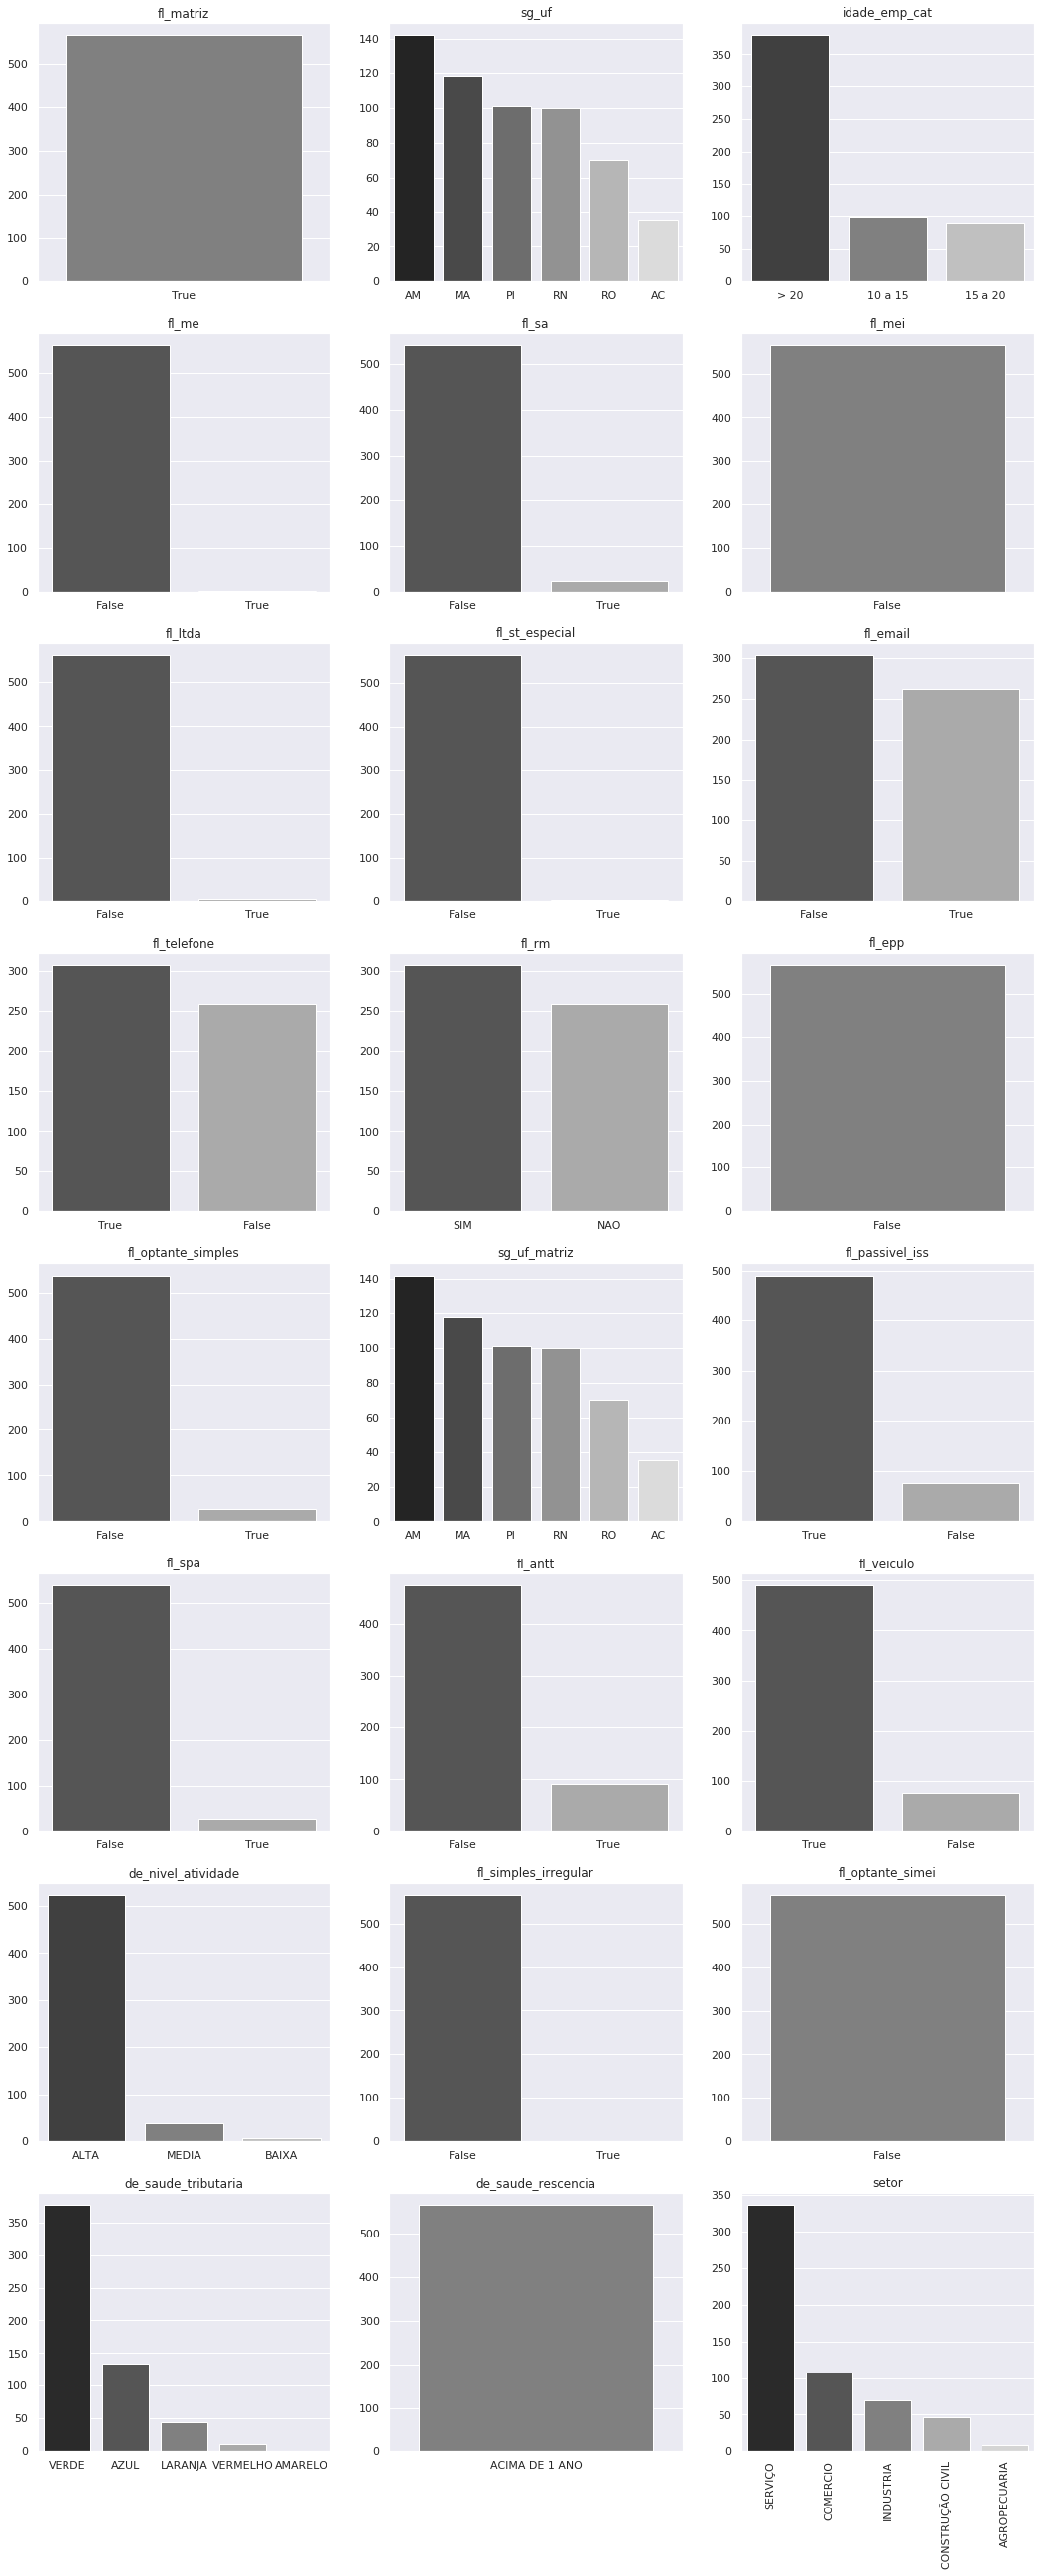

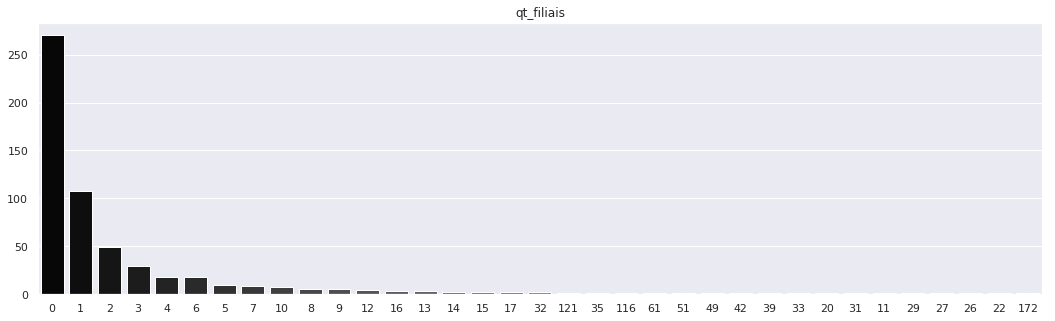

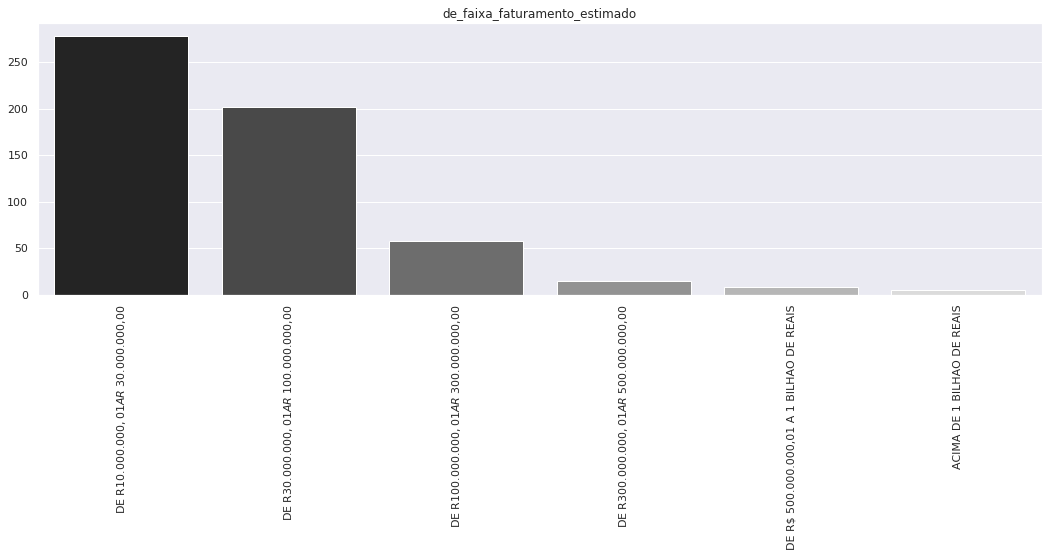

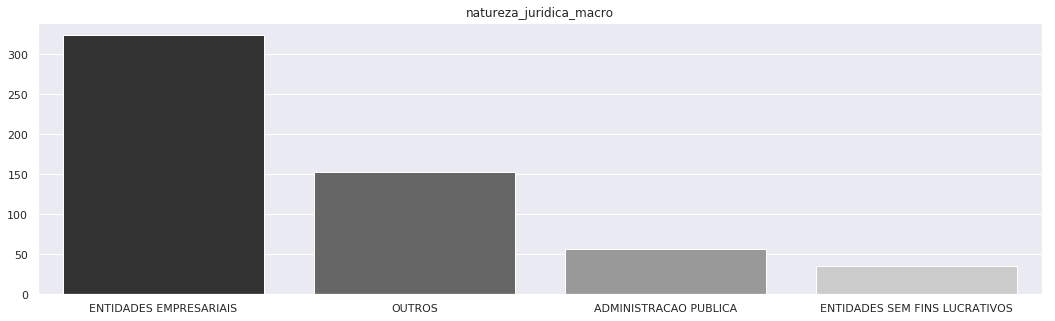

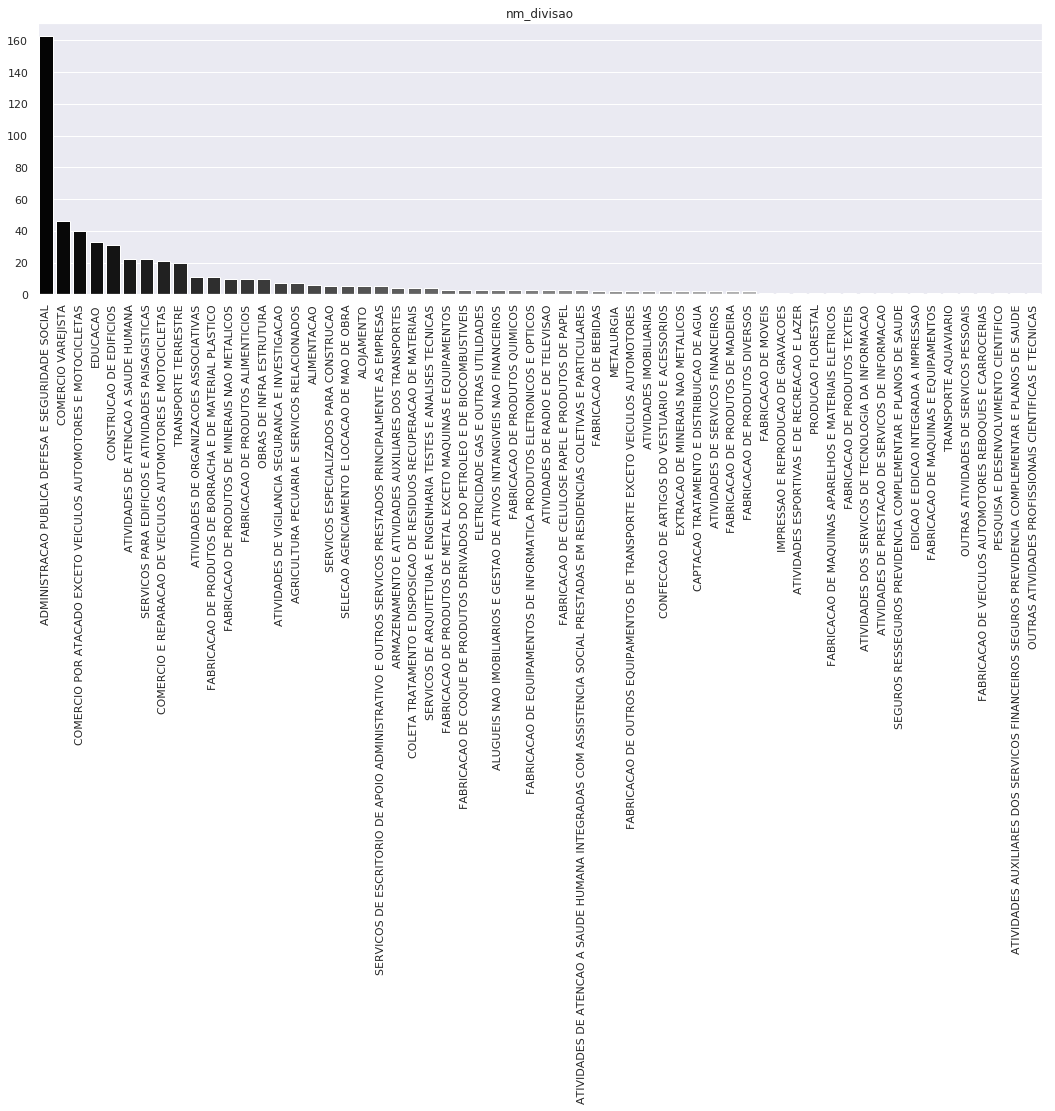

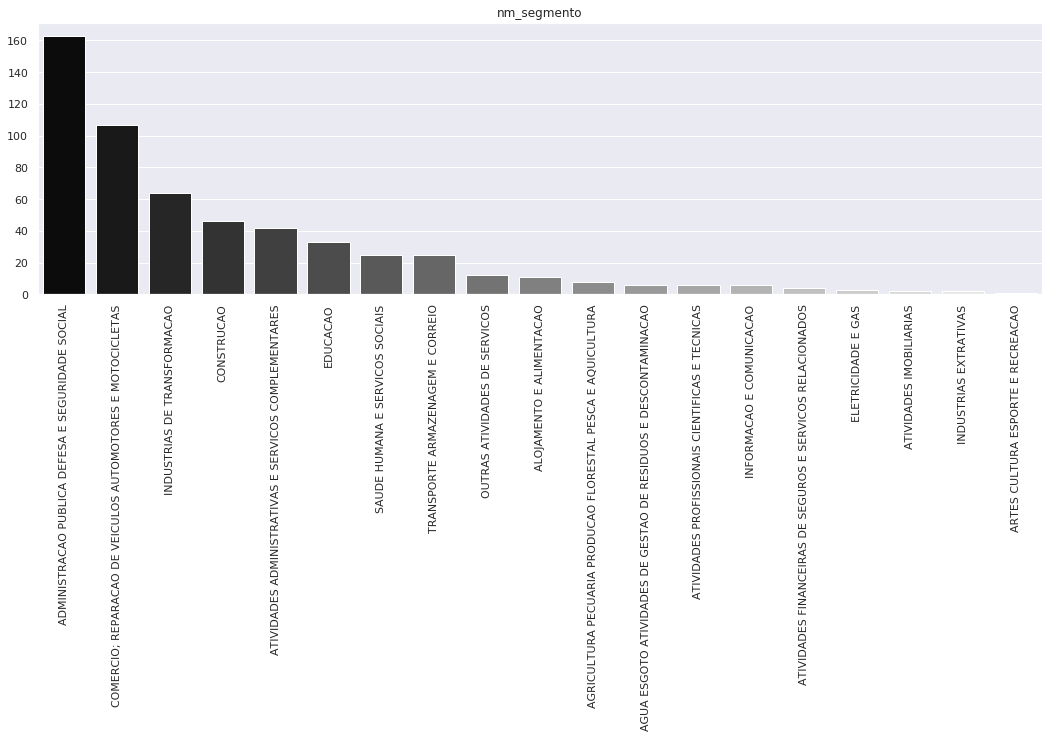

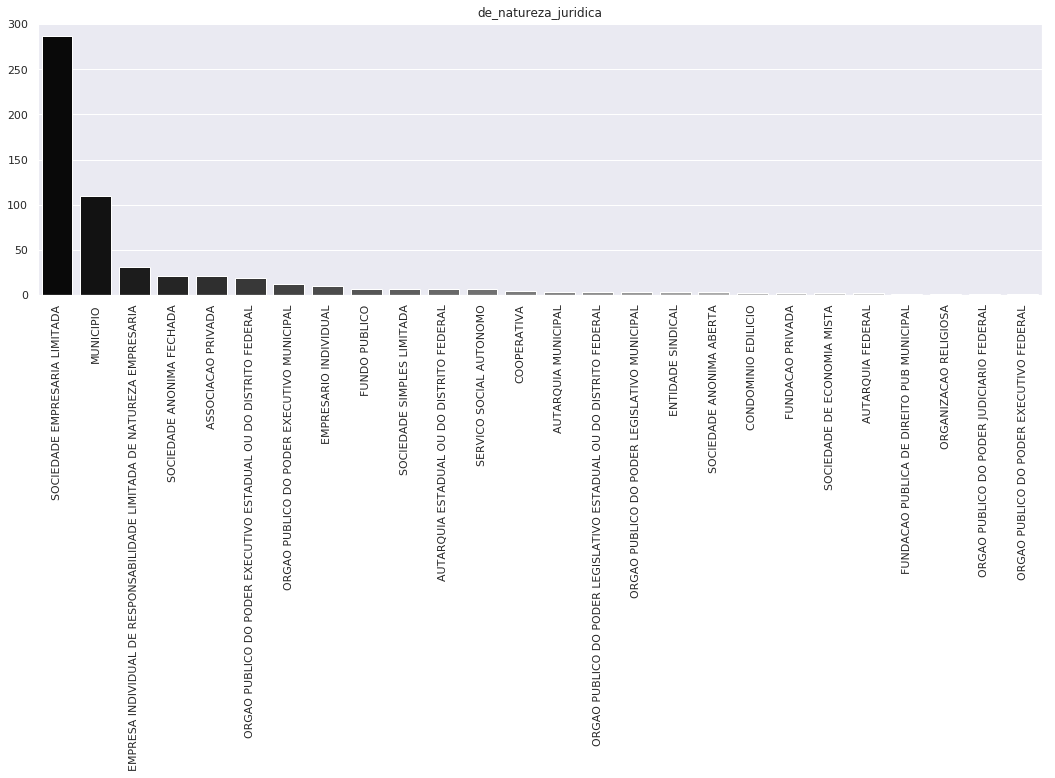

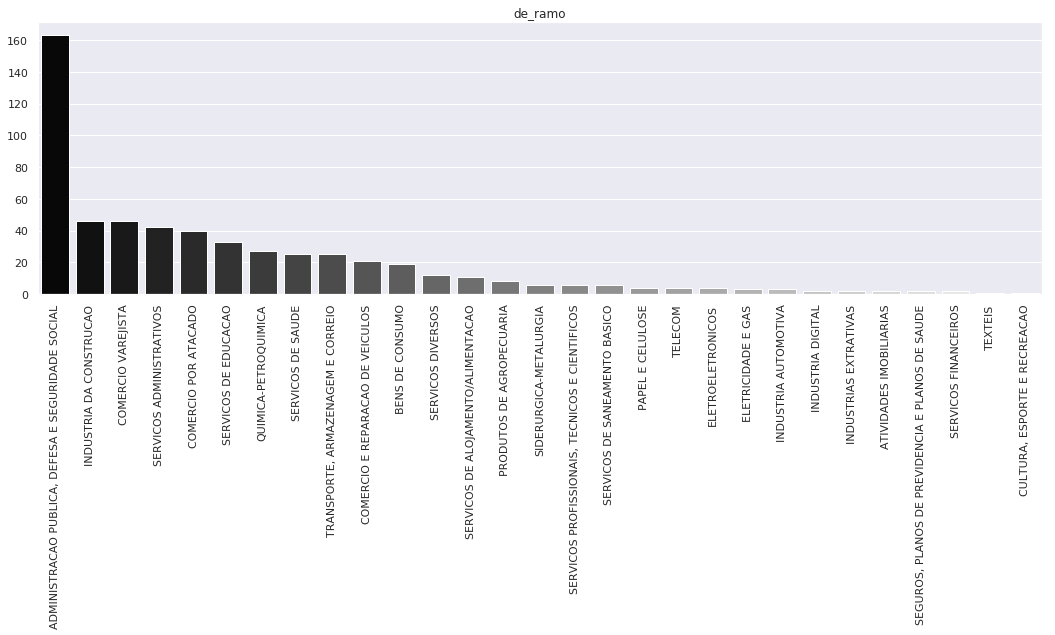

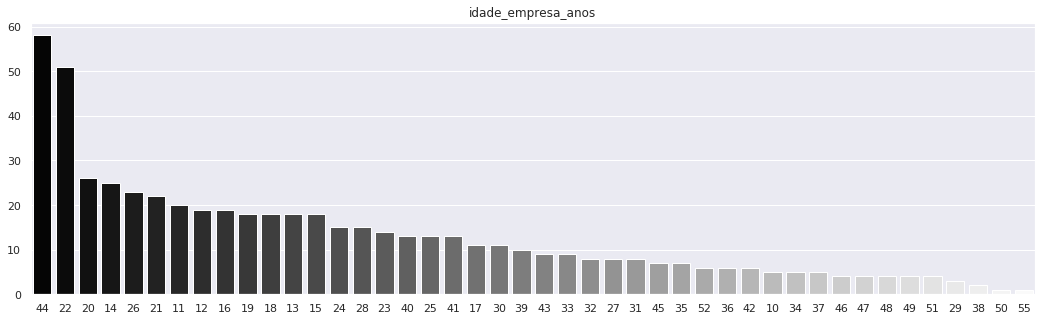

In [ ]:
f, axes= plt.subplots(8, 3, figsize=(18, 45))

sns.countplot(data=portfolio_2_T2, x="fl_matriz", palette = 'gist_gray', order = portfolio_2_T2['fl_matriz'].value_counts().index, ax=axes[0,0]);
axes[0,0].set_title("fl_matriz")
axes[0,0].set_ylabel("")
axes[0,0].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="sg_uf", palette = 'gist_gray', order = portfolio_2_T2['sg_uf'].value_counts().index, ax=axes[0,1]);
axes[0,1].set_title("sg_uf")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="idade_emp_cat", palette = 'gist_gray', order = portfolio_2_T2['idade_emp_cat'].value_counts().index, ax=axes[0,2]);
axes[0,2].set_title("idade_emp_cat")
axes[0,2].set_ylabel("")
axes[0,2].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="fl_me", palette = 'gist_gray', order = portfolio_2_T2['fl_me'].value_counts().index, ax=axes[1,0]);
axes[1,0].set_title("fl_me")
axes[1,0].set_ylabel("")
axes[1,0].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="fl_sa", palette = 'gist_gray', order = portfolio_2_T2['fl_sa'].value_counts().index, ax=axes[1,1]);
axes[1,1].set_title("fl_sa")
axes[1,1].set_ylabel("")
axes[1,1].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="fl_mei", palette = 'gist_gray', order = portfolio_2_T2['fl_mei'].value_counts().index, ax=axes[1,2]);
axes[1,2].set_title("fl_mei")
axes[1,2].set_ylabel("")
axes[1,2].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="fl_ltda", palette = 'gist_gray', order = portfolio_2_T2['fl_ltda'].value_counts().index, ax=axes[2,0]);
axes[2,0].set_title("fl_ltda")
axes[2,0].set_ylabel("")
axes[2,0].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="fl_st_especial", palette = 'gist_gray', order = portfolio_2_T2['fl_st_especial'].value_counts().index, ax=axes[2,1]);
axes[2,1].set_title("fl_st_especial")
axes[2,1].set_ylabel("")
axes[2,1].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="fl_email", palette = 'gist_gray', order = portfolio_2_T2['fl_email'].value_counts().index, ax=axes[2,2]);
axes[2,2].set_title("fl_email")
axes[2,2].set_ylabel("")
axes[2,2].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="fl_telefone", palette = 'gist_gray', order = portfolio_2_T2['fl_telefone'].value_counts().index, ax=axes[3,0]);
axes[3,0].set_title("fl_telefone")
axes[3,0].set_ylabel("")
axes[3,0].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="fl_rm", palette = 'gist_gray', order = portfolio_2_T2['fl_rm'].value_counts().index, ax=axes[3,1]);
axes[3,1].set_title("fl_rm")
axes[3,1].set_ylabel("")
axes[3,1].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="fl_epp", palette = 'gist_gray', order = portfolio_2_T2['fl_epp'].value_counts().index, ax=axes[3,2]);
axes[3,2].set_title("fl_epp")
axes[3,2].set_ylabel("")
axes[3,2].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="fl_optante_simples", palette = 'gist_gray', order = portfolio_2_T2['fl_optante_simples'].value_counts().index, ax=axes[4,0]);
axes[4,0].set_title("fl_optante_simples")
axes[4,0].set_ylabel("")
axes[4,0].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="sg_uf_matriz", palette = 'gist_gray', order = portfolio_2_T2['sg_uf_matriz'].value_counts().index, ax=axes[4,1]);
plt.xticks(rotation=90)
axes[4,1].set_title("sg_uf_matriz")
axes[4,1].set_ylabel("")
axes[4,1].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="fl_passivel_iss", palette = 'gist_gray', order = portfolio_2_T2['fl_passivel_iss'].value_counts().index, ax=axes[4,2]);
axes[4,2].set_title("fl_passivel_iss")
axes[4,2].set_ylabel("")
axes[4,2].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="fl_spa", palette = 'gist_gray', order = portfolio_2_T2['fl_spa'].value_counts().index, ax=axes[5,0]);
axes[5,0].set_title("fl_spa")
axes[5,0].set_ylabel("")
axes[5,0].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="fl_antt", palette = 'gist_gray', order = portfolio_2_T2['fl_antt'].value_counts().index, ax=axes[5,1]);
axes[5,1].set_title("fl_antt")
axes[5,1].set_ylabel("")
axes[5,1].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="fl_veiculo", palette = 'gist_gray', order = portfolio_2_T2['fl_veiculo'].value_counts().index, ax=axes[5,2]);
axes[5,2].set_title("fl_veiculo")
axes[5,2].set_ylabel("")
axes[5,2].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="de_nivel_atividade", palette = 'gist_gray', order = portfolio_2_T2['de_nivel_atividade'].value_counts().index, ax=axes[6,0]);
axes[6,0].set_title("de_nivel_atividade")
axes[6,0].set_ylabel("")
axes[6,0].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="fl_simples_irregular", palette = 'gist_gray', order = portfolio_2_T2['fl_simples_irregular'].value_counts().index, ax=axes[6,1]);
axes[6,1].set_title("fl_simples_irregular")
axes[6,1].set_ylabel("")
axes[6,1].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="fl_optante_simei", palette = 'gist_gray', order = portfolio_2_T2['fl_optante_simei'].value_counts().index, ax=axes[6,2]);
axes[6,2].set_title("fl_optante_simei")
axes[6,2].set_ylabel("")
axes[6,2].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="de_saude_tributaria", palette = 'gist_gray', order = portfolio_2_T2['de_saude_tributaria'].value_counts().index, ax=axes[7,0]);
axes[7,0].set_title("de_saude_tributaria")
axes[7,0].set_ylabel("")
axes[7,0].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="de_saude_rescencia", palette = 'gist_gray', order = portfolio_2_T2['de_saude_rescencia'].value_counts().index, ax=axes[7,1]);
axes[7,1].set_title("de_saude_rescencia")
axes[7,1].set_ylabel("")
axes[7,1].set_xlabel("")

sns.countplot(data=portfolio_2_T2, x="setor", palette = 'gist_gray', order = portfolio_2_T2['setor'].value_counts().index, ax=axes[7,2]);
axes[7,2].set_title("setor")
axes[7,2].set_ylabel("")
axes[7,2].set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_2_T2, x="qt_filiais", palette = 'gist_gray', order = portfolio_2_T2['qt_filiais'].value_counts().index);
ax.set_title("qt_filiais")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_2_T2, x="de_faixa_faturamento_estimado", palette = 'gist_gray', order = portfolio_2_T2['de_faixa_faturamento_estimado'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_faixa_faturamento_estimado")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_2_T2, x="natureza_juridica_macro", palette = 'gist_gray', order = portfolio_2_T2['natureza_juridica_macro'].value_counts().index);
ax.set_title("natureza_juridica_macro")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_2_T2, x="nm_divisao", palette = 'gist_gray', order = portfolio_2_T2['nm_divisao'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_divisao")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_2_T2, x="nm_segmento", palette = 'gist_gray', order = portfolio_2_T2['nm_segmento'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_segmento")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_2_T2, x="de_natureza_juridica", palette = 'gist_gray', order = portfolio_2_T2['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica")
ax.set_ylabel("")
ax.set_xlabel("")


fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_2_T2, x="de_ramo", palette = 'gist_gray', order = portfolio_2_T2['de_ramo'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_ramo")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_2_T2, x="idade_empresa_anos", palette = 'gist_gray', order = portfolio_2_T2['idade_empresa_anos'].value_counts().index);
ax.set_title("idade_empresa_anos")
ax.set_ylabel("")
ax.set_xlabel("")

plt.show()

>> ### Correlações:

In [ ]:
# Converter colunas object para valor numérico 
portfolio_2_T2['de_natureza_juridica'] = pd.factorize(portfolio_2_T2['de_natureza_juridica'])[0]
portfolio_2_T2['sg_uf'] = pd.factorize(portfolio_2_T2['sg_uf'])[0]
portfolio_2_T2['natureza_juridica_macro'] = pd.factorize(portfolio_2_T2['natureza_juridica_macro'])[0]
portfolio_2_T2['de_ramo'] = pd.factorize(portfolio_2_T2['de_ramo'])[0]
portfolio_2_T2['setor'] = pd.factorize(portfolio_2_T2['setor'])[0]
portfolio_2_T2['idade_emp_cat'] = pd.factorize(portfolio_2_T2['idade_emp_cat'])[0]
portfolio_2_T2['dt_situacao'] = pd.factorize(portfolio_2_T2['dt_situacao'])[0]
portfolio_2_T2['fl_rm'] = pd.factorize(portfolio_2_T2['fl_rm'])[0]
portfolio_2_T2['nm_divisao'] = pd.factorize(portfolio_2_T2['nm_divisao'])[0]
portfolio_2_T2['nm_segmento'] = pd.factorize(portfolio_2_T2['nm_segmento'])[0]
portfolio_2_T2['sg_uf_matriz'] = pd.factorize(portfolio_2_T2['sg_uf_matriz'])[0]
portfolio_2_T2['fl_spa'] = pd.factorize(portfolio_2_T2['fl_spa'])[0]
portfolio_2_T2['fl_antt'] = pd.factorize(portfolio_2_T2['fl_antt'])[0]
portfolio_2_T2['fl_veiculo'] = pd.factorize(portfolio_2_T2['fl_veiculo'])[0]
portfolio_2_T2['fl_optante_simples'] = pd.factorize(portfolio_2_T2['fl_optante_simples'])[0]
portfolio_2_T2['fl_optante_simei'] = pd.factorize(portfolio_2_T2['fl_optante_simei'])[0]
portfolio_2_T2['de_saude_tributaria'] = pd.factorize(portfolio_2_T2['de_saude_tributaria'])[0]
portfolio_2_T2['de_saude_rescencia'] = pd.factorize(portfolio_2_T2['de_saude_rescencia'])[0]
portfolio_2_T2['de_nivel_atividade'] = pd.factorize(portfolio_2_T2['de_nivel_atividade'])[0]
portfolio_2_T2['fl_simples_irregular'] = pd.factorize(portfolio_2_T2['fl_simples_irregular'])[0]
portfolio_2_T2['fl_passivel_iss'] = pd.factorize(portfolio_2_T2['fl_passivel_iss'])[0]
portfolio_2_T2['de_faixa_faturamento_estimado'] = pd.factorize(portfolio_2_T2['de_faixa_faturamento_estimado'])[0]
portfolio_2_T2['de_faixa_faturamento_estimado_grupo'] = pd.factorize(portfolio_2_T2['de_faixa_faturamento_estimado_grupo'])[0]

In [ ]:
correlacao = portfolio_2_T2.corr(method="pearson")
correlacao

fl_matriz  ...  qt_filiais
fl_matriz                                  NaN  ...         NaN
de_natureza_juridica                       NaN  ...    0.116855
sg_uf                                      NaN  ...    0.007736
natureza_juridica_macro                    NaN  ...    0.090397
de_ramo                                    NaN  ...    0.103017
setor                                      NaN  ...    0.038227
idade_empresa_anos                         NaN  ...    0.087694
idade_emp_cat                              NaN  ...   -0.013581
fl_me                                      NaN  ...   -0.017343
fl_sa                                      NaN  ...    0.132027
fl_epp                                     NaN  ...         NaN
fl_mei                                     NaN  ...         NaN
fl_ltda                                    NaN  ...   -0.019205
dt_situacao                                NaN  ...   -0.031319
fl_st_especial                             NaN  ...    0.015478
fl_email                                   NaN  ...    0.049914
fl_telefone                                NaN  ...    0.034452
fl_rm                                      NaN  ...    0.112036
nm_divisao                                 NaN  ...    0.046105
nm_segmento                                NaN  ...    0.107719
fl_spa                                     NaN  ...    0.007215
fl_antt                                    NaN  ...    0.009345
fl_veiculo                                 NaN  ...   -0.039121
fl_optante_simples                         NaN  ...   -0.061669
vl_total_veiculos_pesados_grupo            NaN  ...    0.057576
vl_total_veiculos_leves_grupo              NaN  ...    0.200647
fl_optante_simei                           NaN  ...         NaN
sg_uf_matriz                               NaN  ...    0.007736
de_saude_tributaria                        NaN  ...   -0.029636
de_saude_rescencia                         NaN  ...         NaN
nu_meses_rescencia                         NaN  ...   -0.014611
de_nivel_atividade                         NaN  ...   -0.049342
fl_simples_irregular                       NaN  ...   -0.012252
fl_passivel_iss                            NaN  ...   -0.024621
de_faixa_faturamento_estimado              NaN  ...    0.062476
de_faixa_faturamento_estimado_grupo        NaN  ...    0.083267
vl_faturamento_estimado_aux                NaN  ...    0.418647
vl_faturamento_estimado_grupo_aux          NaN  ...    0.600320
qt_ex_funcionarios                         NaN  ...    0.195367
qt_funcionarios_grupo                      NaN  ...    0.496978
percent_func_genero_masc                   NaN  ...   -0.063711
percent_func_genero_fem                    NaN  ...    0.063711
total                                      NaN  ...    0.414767
meses_ultima_contratacaco                  NaN  ...   -0.081039
qt_admitidos_12meses                       NaN  ...    0.103307
qt_desligados_12meses                      NaN  ...    0.074920
qt_desligados                              NaN  ...    0.195394
qt_admitidos                               NaN  ...    0.361933
media_meses_servicos_all                   NaN  ...   -0.017042
max_meses_servicos_all                     NaN  ...   -0.010607
min_meses_servicos_all                     NaN  ...   -0.044077
media_meses_servicos                       NaN  ...   -0.021730
max_meses_servicos                         NaN  ...    0.006458
min_meses_servicos                         NaN  ...   -0.082119
qt_funcionarios                            NaN  ...    0.414844
qt_funcionarios_12meses                    NaN  ...    0.411015
qt_funcionarios_24meses                    NaN  ...    0.401339
tx_rotatividade                            NaN  ...    0.015187
qt_filiais                                 NaN  ...    1.000000

[59 rows x 59 columns]

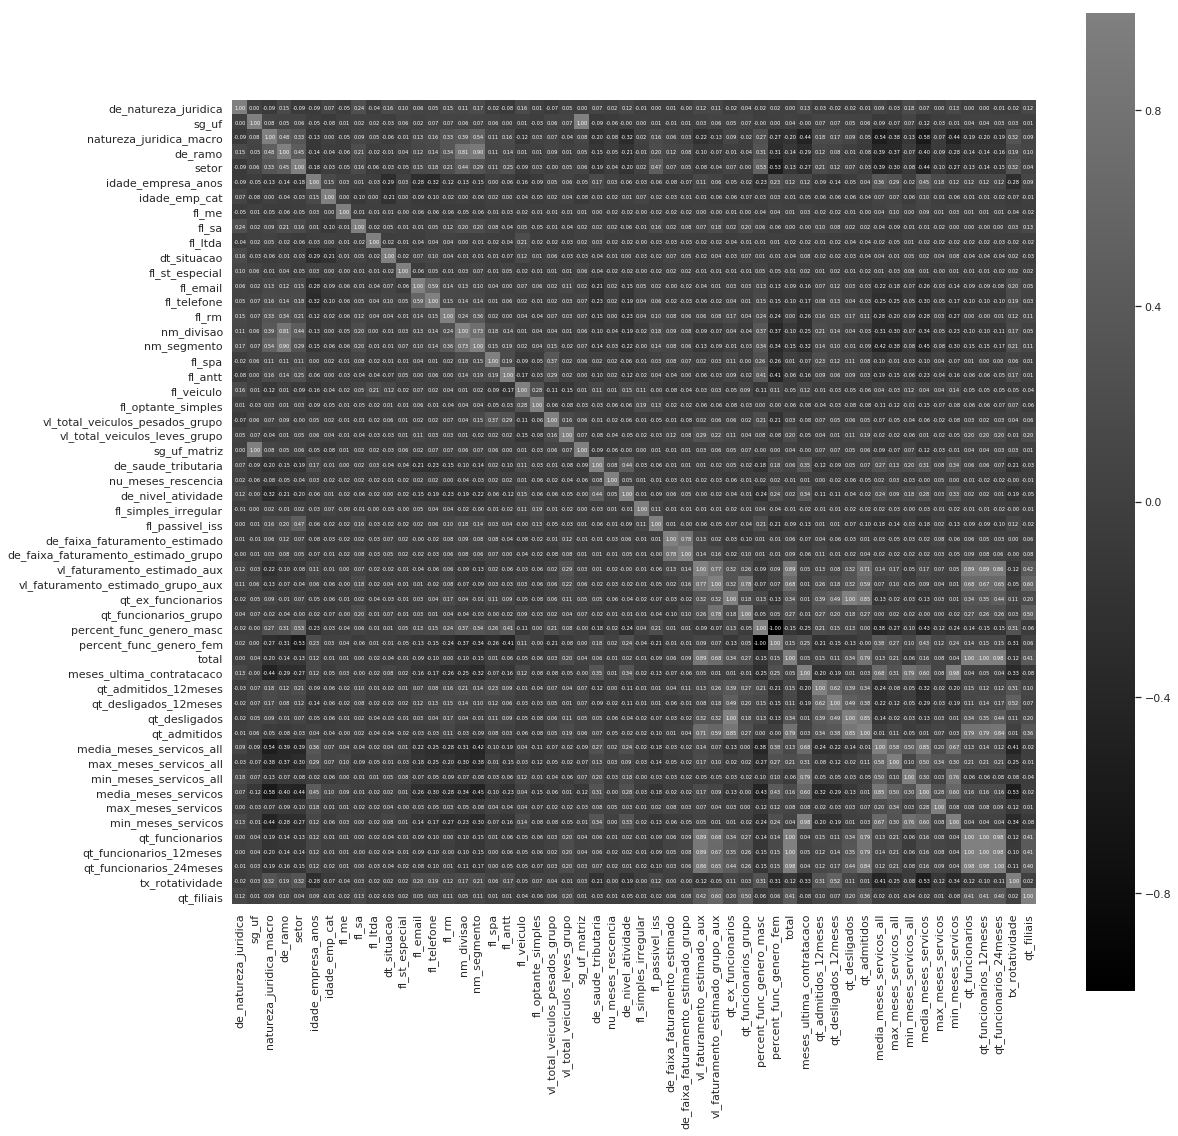

In [ ]:
cor_market_portfolio_2_T2 = portfolio_2_T2.drop(['fl_matriz','fl_epp','fl_mei', 'fl_optante_simei', 'de_saude_rescencia'], axis = 1)
correlacao = cor_market_portfolio_2_T2.corr(method="pearson")
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(correlacao, center=True, square=True, annot=True, cmap="gist_gray",fmt='.2f', 
                 annot_kws={'size': 5});

>> ### Observações sobre o tipo de cliente da empresa 2:

- Os clientes disponibilizam pelo menos 60 dados (já contando com o id);
- Têm 10 anos ou mais de mercado, sendo que a maioria possui mais de 20;
- A maioria é do setor de serviço, mas há também de comércio, indústria, construção civil e agro;
- Possuem faturamento acima de 10 milhões de reais;
- Natureza jurídica variada, mas a maioria são empresas seguido de  municípios e órgãos públicos;
- Ramos de atuação variados mas o principal é administração pública, defesa e seguridade social;
- O dado:  fl_matriz sempre tem valor “True”;
- Os dados: fl_me, fl_mei, fl_epp e fl_optante_simei sempre apresentam valor “False”.


> ## Explorando o Dataset Porfólio 3:

>> ### Tipos dos dados:

In [ ]:
# Esse portfólio só possui o id, então primeiro completamos o dataset com os demais dados.
portfolio_3_T1 = pd.DataFrame(portfolio_3['id'])
portfolio_3_T1 = pd.merge(portfolio_3_T1, market, on='id', how='left')

tipos_de_dados_portfolio_3_T1 = portfolio_3_T1.dtypes
tipos_de_dados_portfolio_3_T1

id                                                object
Unnamed: 0                                         int64
fl_matriz                                           bool
de_natureza_juridica                              object
sg_uf                                             object
natureza_juridica_macro                           object
de_ramo                                           object
setor                                             object
idade_empresa_anos                               float64
idade_emp_cat                                     object
fl_me                                               bool
fl_sa                                               bool
fl_epp                                              bool
fl_mei                                              bool
fl_ltda                                             bool
dt_situacao                                       object
fl_st_especial                                      bool
fl_email                       

>> ### Quantidade de colunas com NA's:

In [ ]:
qtd_cols_com_na_portfolio_3_T1 = len(portfolio_3_T1.columns[portfolio_3_T1.isna().any()])
qtd_cols_com_na_portfolio_3_T1

118

>> ### Quantidade de colunas sem NA's:

In [ ]:
qtd_cols_sem_na_portfolio_3_T1 = len(portfolio_3_T1.columns) - qtd_cols_com_na_portfolio_3_T1
qtd_cols_sem_na_portfolio_3_T1

64

>> ### Contagem de NA's por colunas:

In [ ]:
qtd_na_por_col_portfolio_3_T1 = portfolio_3_T1.isna().sum().sort_values(ascending=False)
qtd_na_por_col_portfolio_3_T1

qt_alteracao_socio_365d                265
vl_total_veiculos_antt_grupo           265
grau_instrucao_macro_desconhecido      265
qt_socios_st_suspensa                  265
vl_total_veiculos_antt                 265
qt_alteracao_socio_total               265
qt_alteracao_socio_90d                 265
qt_alteracao_socio_180d                265
coligada_mais_nova_baixada             264
idade_media_coligadas_baixadas         264
coligada_mais_antiga_baixada           264
vl_total_tancagem_grupo                255
vl_total_tancagem                      255
qt_socios_pep                          253
qt_socios_pj_nulos                     250
qt_socios_pj_baixados                  250
qt_socios_pj_suspensos                 250
qt_socios_pj_inaptos                   250
vl_idade_media_socios_pj               250
vl_idade_maxima_socios_pj              250
vl_idade_minima_socios_pj              250
qt_socios_pj_ativos                    250
vl_potenc_cons_oleo_gas                243
max_filiais

>> ### Dataframe Portifólio 3 sem as colunas NA's:

In [ ]:
portfolio_3_T2 = portfolio_3_T1.dropna(axis = 'columns')
portfolio_3_T2 = portfolio_3_T2.drop(['Unnamed: 0'], axis = 1) # Exclui a coluna 'Unnamed: 0' que é irrelevante pois possui valor igual ao index.
portfolio_3_T2.head()

id  ...  qt_filiais
0  bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...  ...           2
1  16843c9ffb920170477118933798510d8d5f00f5c56c12...  ...           0
2  1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...  ...           0
3  3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...  ...           0
4  c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...  ...           1

[5 rows x 63 columns]

In [ ]:
print("Após esse primeiro tratamento, as dimensões (linha, coluna) de market são:", portfolio_3_T2.shape)

Após esse primeiro tratamento, as dimensões (linha, coluna) de market são: (265, 63)


>> ### Valores únicos:

In [ ]:
# Primeiro um ajuste nas colunas que estão como float:
portfolio_3_T2['idade_empresa_anos'] = portfolio_3_T2['idade_empresa_anos'].round().astype(int)
portfolio_3_T2['vl_total_veiculos_pesados_grupo'] = portfolio_3_T2['vl_total_veiculos_pesados_grupo'].round().astype(int)
portfolio_3_T2['vl_total_veiculos_leves_grupo'] = portfolio_3_T2['vl_total_veiculos_leves_grupo'].round().astype(int)
portfolio_3_T2['vl_faturamento_estimado_aux'] = portfolio_3_T2['vl_faturamento_estimado_aux'].round().astype(int)
portfolio_3_T2['vl_faturamento_estimado_grupo_aux'] = portfolio_3_T2['vl_faturamento_estimado_grupo_aux'].round().astype(int)
portfolio_3_T2['qt_ex_funcionarios'] = portfolio_3_T2['qt_ex_funcionarios'].round().astype(int)
portfolio_3_T2['qt_funcionarios_grupo'] = portfolio_3_T2['qt_funcionarios_grupo'].round().astype(int)
portfolio_3_T2['percent_func_genero_masc'] = portfolio_3_T2['percent_func_genero_masc'].round().astype(int)
portfolio_3_T2['percent_func_genero_fem'] = portfolio_3_T2['percent_func_genero_fem'].round().astype(int)
portfolio_3_T2['idade_de_34_a_38'] = portfolio_3_T2['idade_de_34_a_38'].round().astype(int)
portfolio_3_T2['idade_de_39_a_43'] = portfolio_3_T2['idade_de_39_a_43'].round().astype(int)
portfolio_3_T2['idade_de_44_a_48'] = portfolio_3_T2['idade_de_44_a_48'].round().astype(int)
portfolio_3_T2['idade_de_49_a_53'] = portfolio_3_T2['idade_de_49_a_53'].round().astype(int)
portfolio_3_T2['grau_instrucao_macro_escolaridade_media'] = portfolio_3_T2['grau_instrucao_macro_escolaridade_media'].round().astype(int)
portfolio_3_T2['total'] = portfolio_3_T2['total'].round().astype(int)
portfolio_3_T2['meses_ultima_contratacaco'] = portfolio_3_T2['meses_ultima_contratacaco'].round().astype(int)
portfolio_3_T2['qt_admitidos_12meses'] = portfolio_3_T2['qt_admitidos_12meses'].round().astype(int)
portfolio_3_T2['qt_desligados_12meses'] = portfolio_3_T2['qt_desligados_12meses'].round().astype(int)
portfolio_3_T2['qt_desligados'] = portfolio_3_T2['qt_desligados'].round().astype(int)
portfolio_3_T2['qt_admitidos'] = portfolio_3_T2['qt_admitidos'].round().astype(int)
portfolio_3_T2['media_meses_servicos_all'] = portfolio_3_T2['media_meses_servicos_all'].round().astype(int)
portfolio_3_T2['max_meses_servicos_all'] = portfolio_3_T2['max_meses_servicos_all'].round().astype(int)
portfolio_3_T2['min_meses_servicos_all'] = portfolio_3_T2['min_meses_servicos_all'].round().astype(int)
portfolio_3_T2['media_meses_servicos'] = portfolio_3_T2['media_meses_servicos'].round().astype(int)
portfolio_3_T2['max_meses_servicos'] = portfolio_3_T2['max_meses_servicos'].round().astype(int)
portfolio_3_T2['min_meses_servicos'] = portfolio_3_T2['min_meses_servicos'].round().astype(int)
portfolio_3_T2['qt_funcionarios'] = portfolio_3_T2['qt_funcionarios'].round().astype(int)
portfolio_3_T2['qt_funcionarios_12meses'] = portfolio_3_T2['qt_funcionarios_12meses'].round().astype(int)
portfolio_3_T2['qt_funcionarios_24meses'] = portfolio_3_T2['qt_funcionarios_24meses'].round().astype(int)
portfolio_3_T2['tx_crescimento_12meses'] = portfolio_3_T2['tx_crescimento_12meses'].round().astype(int)
portfolio_3_T2['tx_rotatividade'] = portfolio_3_T2['tx_rotatividade'].round().astype(int)

In [ ]:
qtd_val_uni_portfolio_3_T2 = portfolio_3_T2.nunique()
tipos_de_dados_portfolio_3_T2 = portfolio_3_T2.dtypes
portfolio_3_T2_qtd_un_tp = pd.concat([qtd_val_uni_portfolio_3_T2, tipos_de_dados_portfolio_3_T2], axis = 1).reset_index()
portfolio_3_T2_qtd_un_tp.columns = ['Coluna', 'Valores unicos', 'Tipo']
portfolio_3_T2_qtd_un_tp

Coluna  Valores unicos    Tipo
0                                        id             265  object
1                                 fl_matriz               1    bool
2                      de_natureza_juridica              25  object
3                                     sg_uf               6  object
4                   natureza_juridica_macro               4  object
5                                   de_ramo              16  object
6                                     setor               1  object
7                        idade_empresa_anos              52   int64
8                             idade_emp_cat               6  object
9                                     fl_me               1    bool
10                                    fl_sa               2    bool
11                                   fl_epp               1    bool
12                                   fl_mei               1    bool
13                                  fl_ltda               2    bool
14                              dt_situacao             129  object
15                           fl_st_especial               1    bool
16                                 fl_email               2    bool
17                              fl_telefone               2    bool
18                                    fl_rm               2  object
19                               nm_divisao              26  object
20                              nm_segmento              13  object
21                                   fl_spa               2  object
22                                  fl_antt               2  object
23                               fl_veiculo               2  object
24          vl_total_veiculos_pesados_grupo              32   int64
25            vl_total_veiculos_leves_grupo              41   int64
26                             sg_uf_matriz               6  object
27                      de_saude_tributaria               5  object
28                       de_saude_rescencia               3  object
29                       de_nivel_atividade               3  object
..                                      ...             ...     ...
33      de_faixa_faturamento_estimado_grupo               6  object
34              vl_faturamento_estimado_aux             248   int64
35        vl_faturamento_estimado_grupo_aux             256   int64
36                       qt_ex_funcionarios             222   int64
37                    qt_funcionarios_grupo             233   int64
38                 percent_func_genero_masc              73   int64
39                  percent_func_genero_fem              73   int64
40                         idade_de_34_a_38             123   int64
41                         idade_de_39_a_43             129   int64
42                         idade_de_44_a_48             119   int64
43                         idade_de_49_a_53             116   int64
44  grau_instrucao_macro_escolaridade_media             196   int64
45                                    total             225   int64
46                meses_ultima_contratacaco              43   int64
47                     qt_admitidos_12meses              73   int64
48                    qt_desligados_12meses              73   int64
49                            qt_desligados             216   int64
50                             qt_admitidos             241   int64
51                 media_meses_servicos_all             168   int64
52                   max_meses_servicos_all             126   int64
53                   min_meses_servicos_all              32   int64
54                     media_meses_servicos             166   int64
55                       max_meses_servicos             183   int64
56                       min_meses_servicos              44   int64
57                          qt_funcionarios             231   int64
58                  qt_funcionarios_12meses             230   int64
59                  qt_funcionarios_24meses             234   int64
60                   tx_c

>> ### Frequência dos valores únicos:

In [ ]:
freq_val_uni_portfolio_3_T2 = portfolio_3_T2.drop(['id'], axis =1).apply(lambda x: [x.value_counts().to_dict()])
freq_val_uni_portfolio_3_T2

fl_matriz                                                                      [{True: 265}]
de_natureza_juridica                       [{'MUNICIPIO': 108, 'SOCIEDADE EMPRESARIA LIMI...
sg_uf                                      [{'MA': 74, 'PI': 52, 'RN': 51, 'AM': 43, 'AC'...
natureza_juridica_macro                    [{'OUTROS': 128, 'ENTIDADES EMPRESARIAIS': 73,...
de_ramo                                    [{'ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE ...
setor                                                                     [{'SERVIÇO': 265}]
idade_empresa_anos                         [{44: 50, 22: 30, 20: 10, 19: 9, 10: 9, 26: 9,...
idade_emp_cat                              [{'> 20': 176, '15 a 20': 33, '5 a 10': 27, '1...
fl_me                                                                         [{False: 265}]
fl_sa                                                                [{False: 260, True: 5}]
fl_epp                                                                

>> ### Visualização dos dados:

>> ### Gráficos:

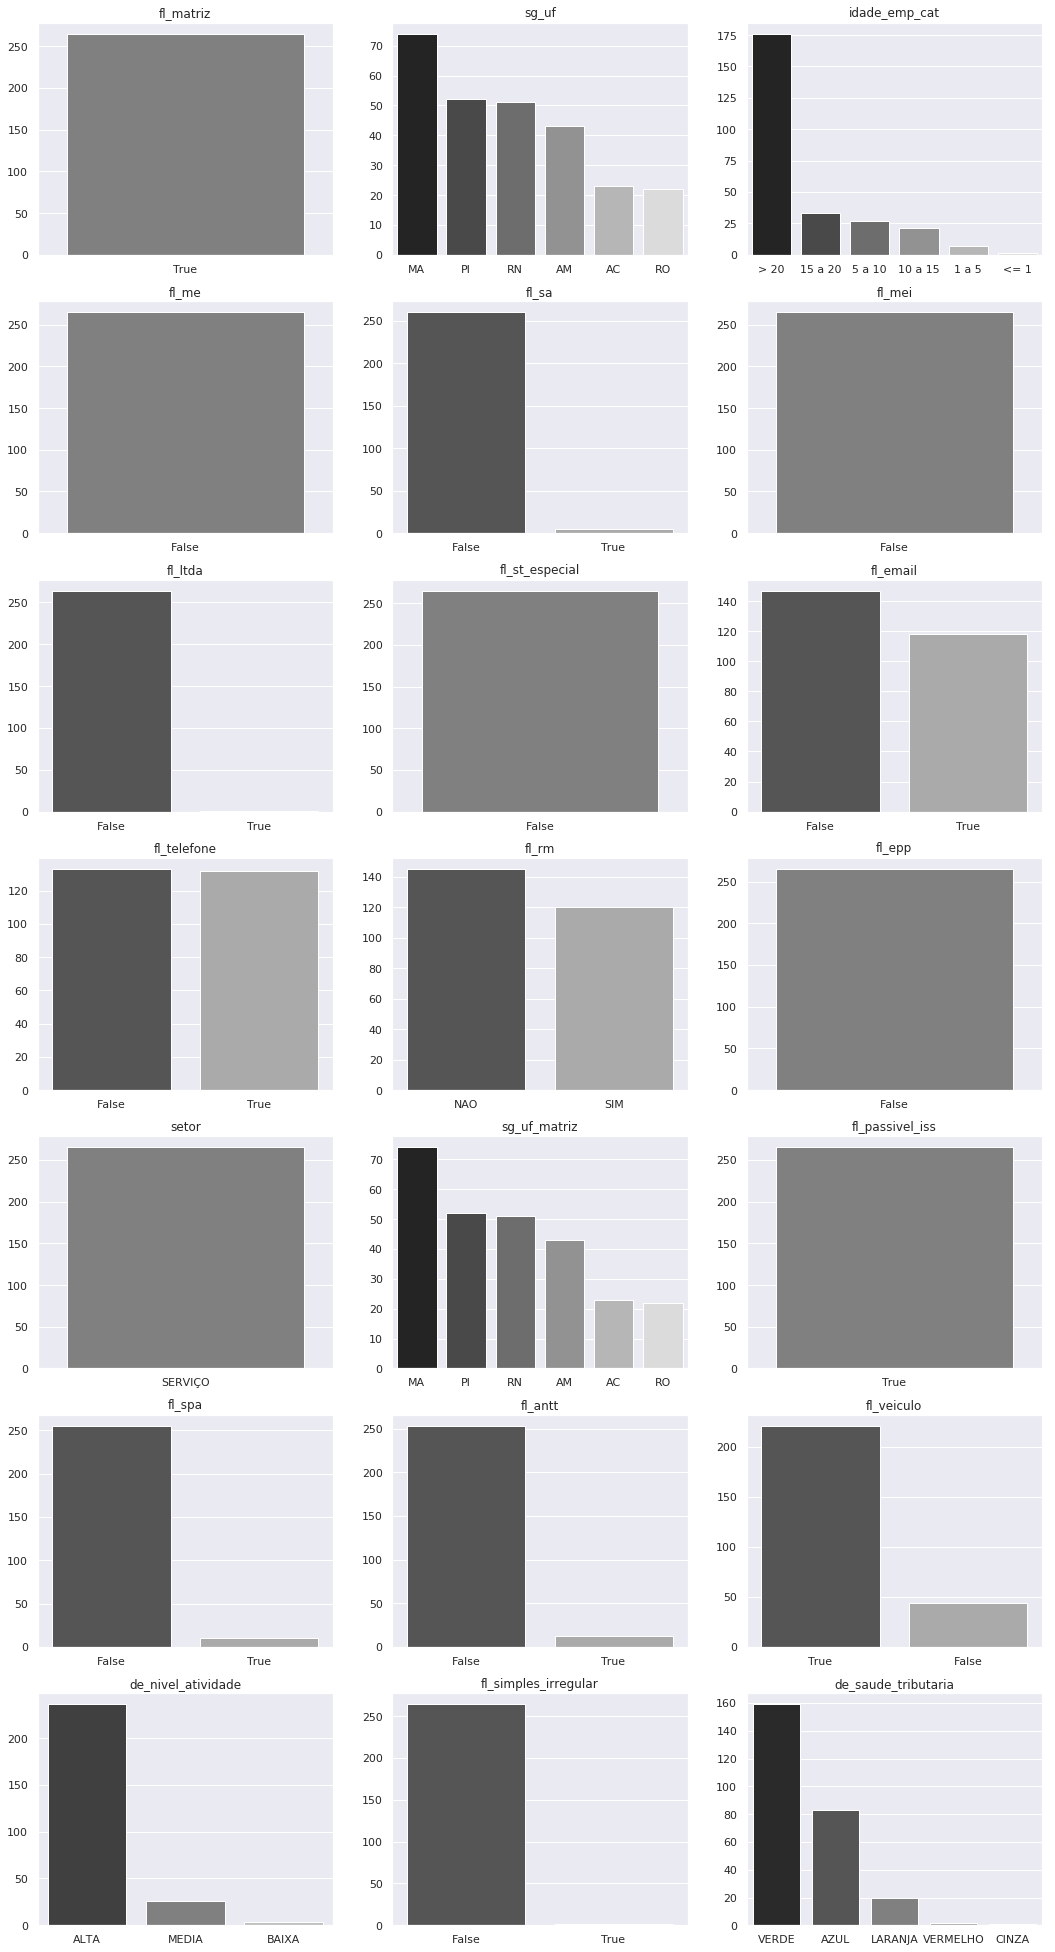

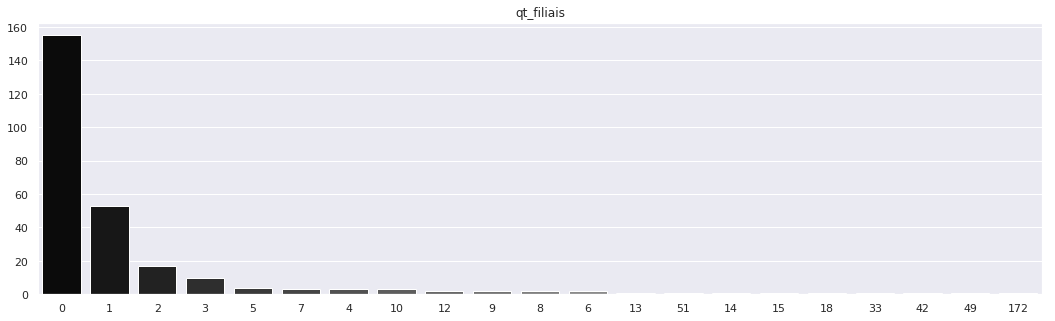

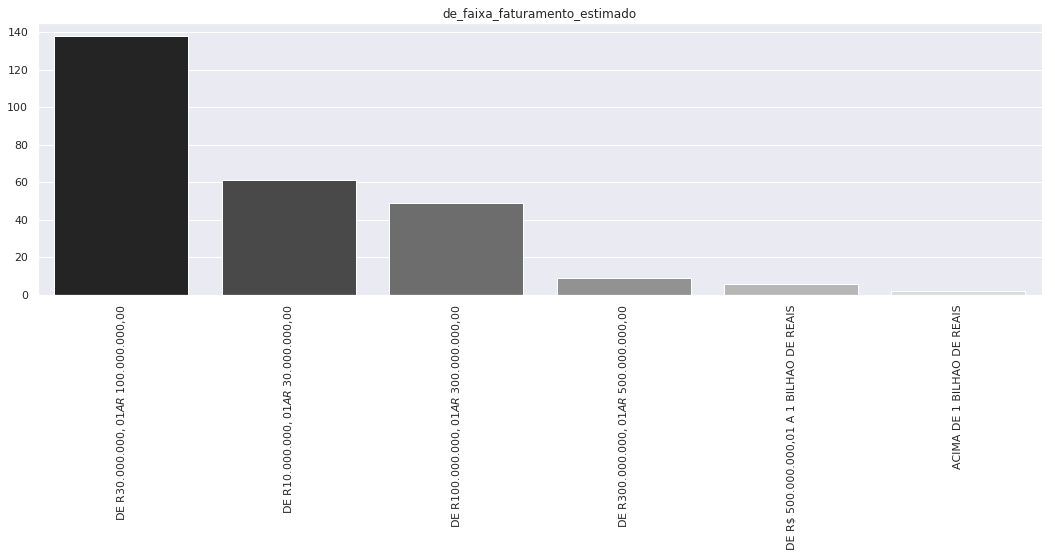

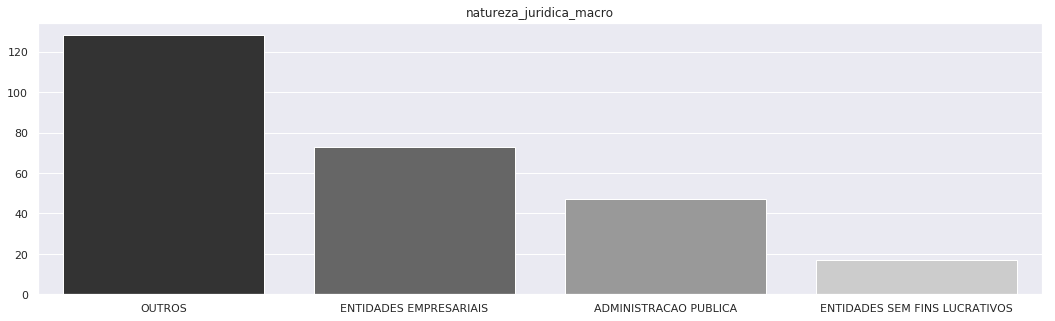

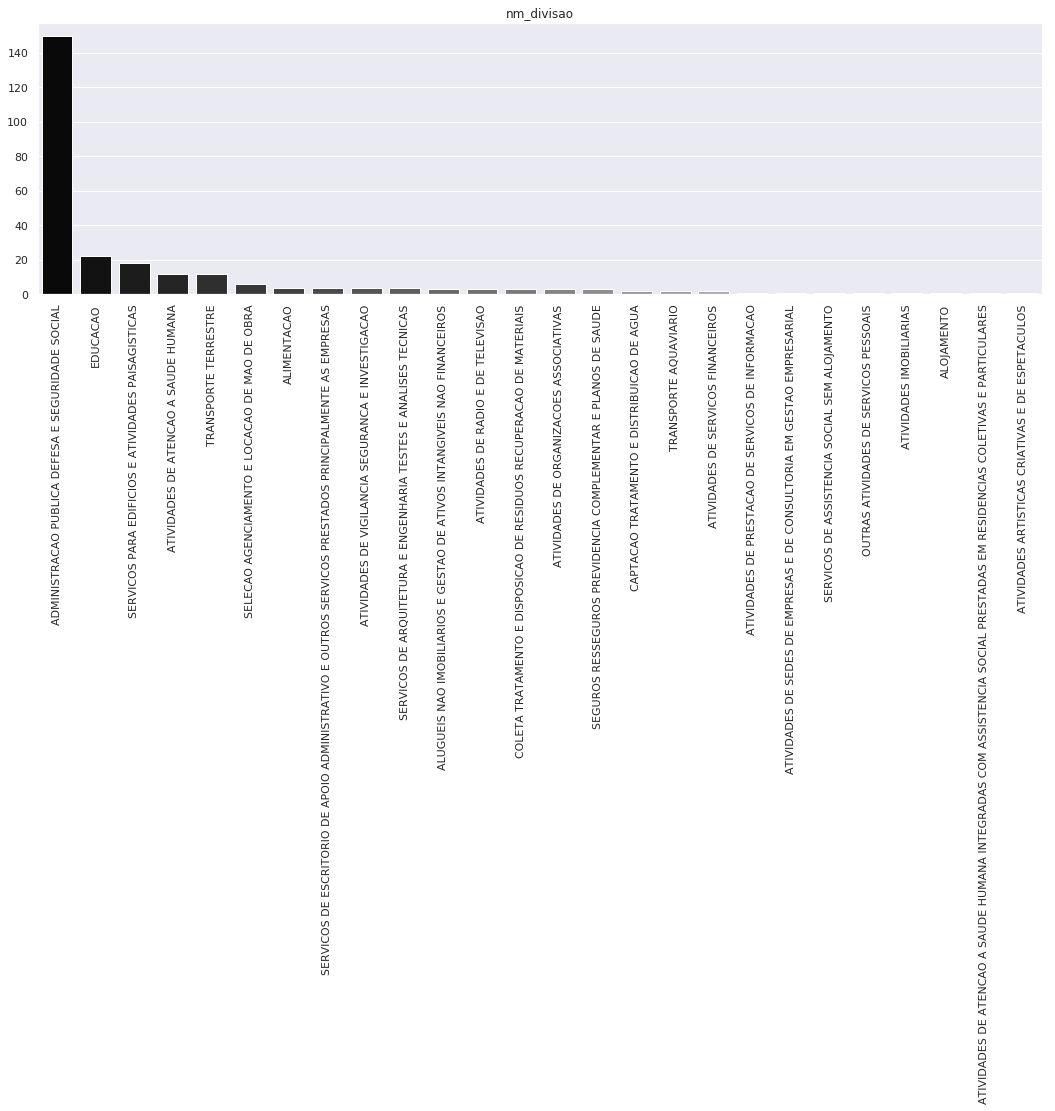

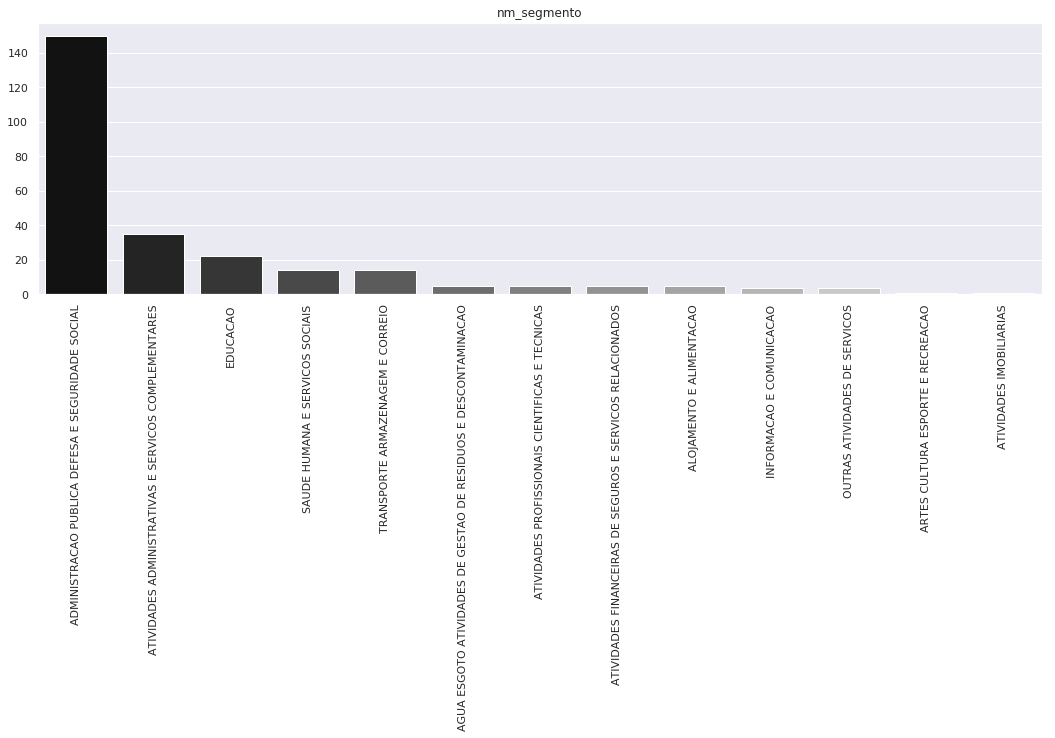

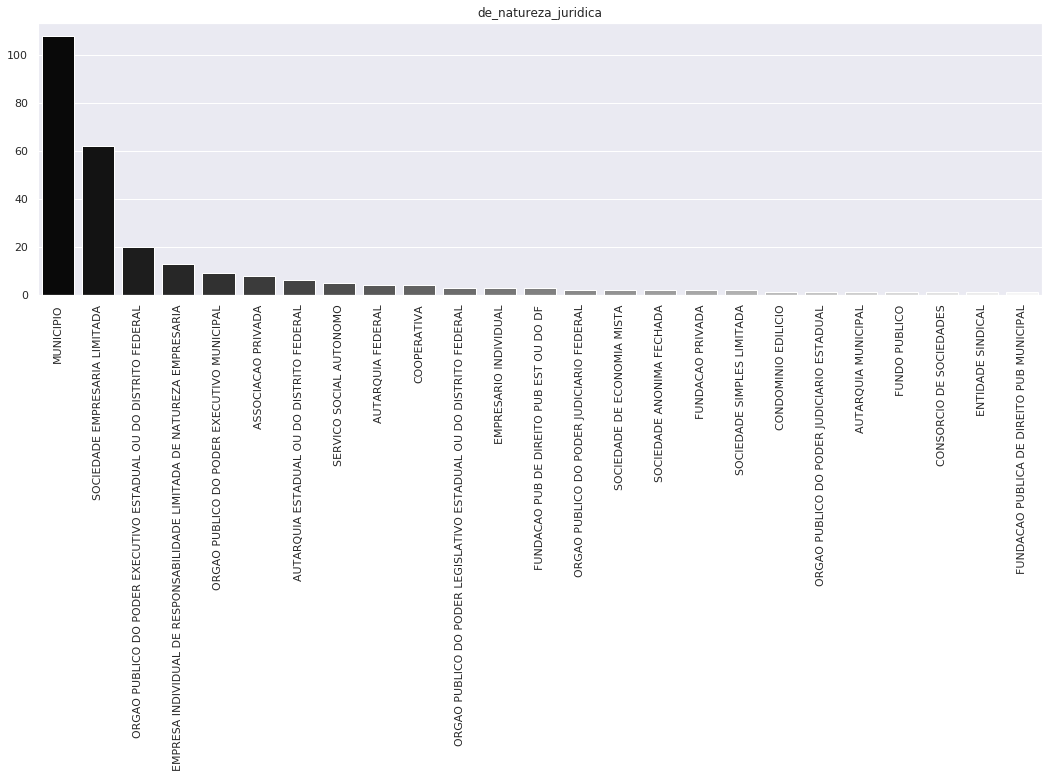

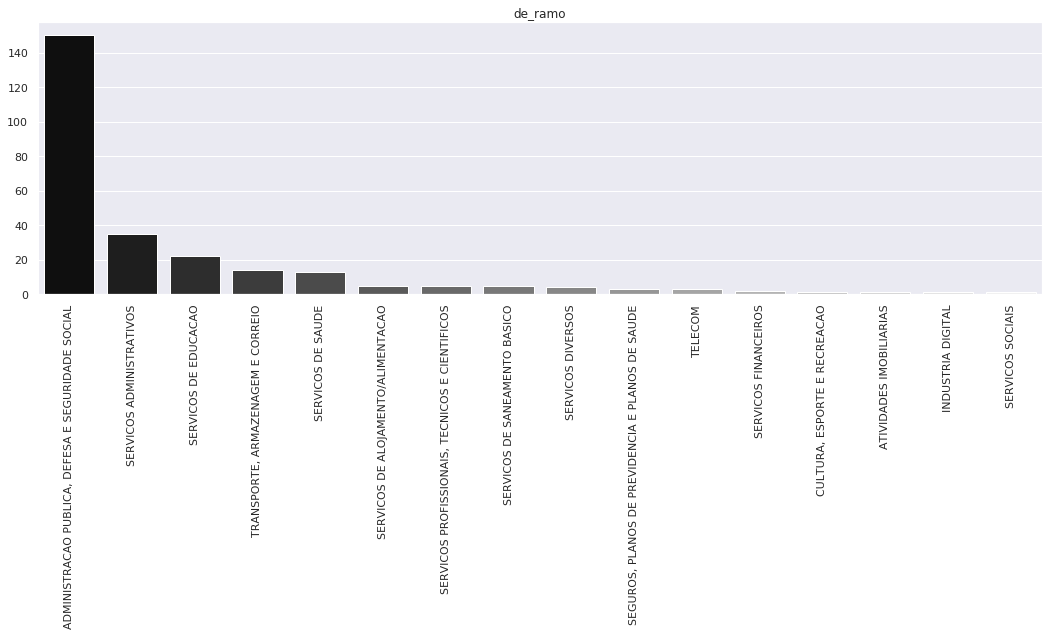

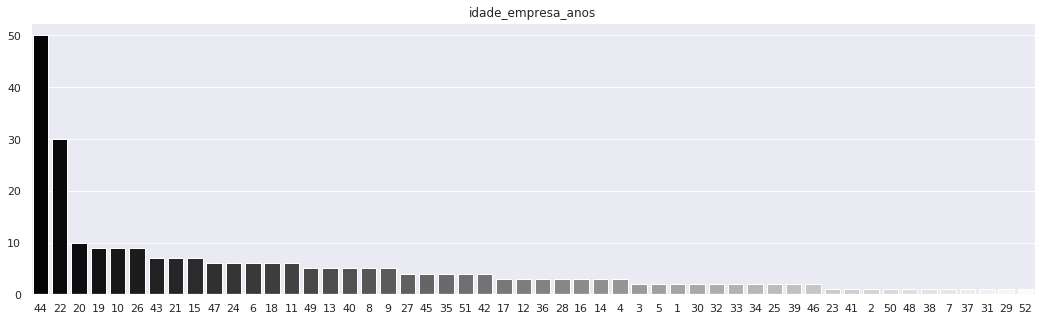

In [ ]:
f, axes= plt.subplots(7, 3, figsize=(18, 35))

sns.countplot(data=portfolio_3_T2, x="fl_matriz", palette = 'gist_gray', order = portfolio_3_T2['fl_matriz'].value_counts().index, ax=axes[0,0]);
axes[0,0].set_title("fl_matriz")
axes[0,0].set_ylabel("")
axes[0,0].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="sg_uf", palette = 'gist_gray', order = portfolio_3_T2['sg_uf'].value_counts().index, ax=axes[0,1]);
axes[0,1].set_title("sg_uf")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="idade_emp_cat", palette = 'gist_gray', order = portfolio_3_T2['idade_emp_cat'].value_counts().index, ax=axes[0,2]);
axes[0,2].set_title("idade_emp_cat")
axes[0,2].set_ylabel("")
axes[0,2].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="fl_me", palette = 'gist_gray', order = portfolio_3_T2['fl_me'].value_counts().index, ax=axes[1,0]);
axes[1,0].set_title("fl_me")
axes[1,0].set_ylabel("")
axes[1,0].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="fl_sa", palette = 'gist_gray', order = portfolio_3_T2['fl_sa'].value_counts().index, ax=axes[1,1]);
axes[1,1].set_title("fl_sa")
axes[1,1].set_ylabel("")
axes[1,1].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="fl_mei", palette = 'gist_gray', order = portfolio_3_T2['fl_mei'].value_counts().index, ax=axes[1,2]);
axes[1,2].set_title("fl_mei")
axes[1,2].set_ylabel("")
axes[1,2].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="fl_ltda", palette = 'gist_gray', order = portfolio_3_T2['fl_ltda'].value_counts().index, ax=axes[2,0]);
axes[2,0].set_title("fl_ltda")
axes[2,0].set_ylabel("")
axes[2,0].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="fl_st_especial", palette = 'gist_gray', order = portfolio_3_T2['fl_st_especial'].value_counts().index, ax=axes[2,1]);
axes[2,1].set_title("fl_st_especial")
axes[2,1].set_ylabel("")
axes[2,1].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="fl_email", palette = 'gist_gray', order = portfolio_3_T2['fl_email'].value_counts().index, ax=axes[2,2]);
axes[2,2].set_title("fl_email")
axes[2,2].set_ylabel("")
axes[2,2].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="fl_telefone", palette = 'gist_gray', order = portfolio_3_T2['fl_telefone'].value_counts().index, ax=axes[3,0]);
axes[3,0].set_title("fl_telefone")
axes[3,0].set_ylabel("")
axes[3,0].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="fl_rm", palette = 'gist_gray', order = portfolio_3_T2['fl_rm'].value_counts().index, ax=axes[3,1]);
axes[3,1].set_title("fl_rm")
axes[3,1].set_ylabel("")
axes[3,1].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="fl_epp", palette = 'gist_gray', order = portfolio_3_T2['fl_epp'].value_counts().index, ax=axes[3,2]);
axes[3,2].set_title("fl_epp")
axes[3,2].set_ylabel("")
axes[3,2].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="setor", palette = 'gist_gray', order = portfolio_3_T2['setor'].value_counts().index, ax=axes[4,0]);
axes[4,0].set_title("setor")
axes[4,0].set_ylabel("")
axes[4,0].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="sg_uf_matriz", palette = 'gist_gray', order = portfolio_3_T2['sg_uf_matriz'].value_counts().index, ax=axes[4,1]);
axes[4,1].set_title("sg_uf_matriz")
axes[4,1].set_ylabel("")
axes[4,1].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="fl_passivel_iss", palette = 'gist_gray', order = portfolio_3_T2['fl_passivel_iss'].value_counts().index, ax=axes[4,2]);
axes[4,2].set_title("fl_passivel_iss")
axes[4,2].set_ylabel("")
axes[4,2].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="fl_spa", palette = 'gist_gray', order = portfolio_3_T2['fl_spa'].value_counts().index, ax=axes[5,0]);
axes[5,0].set_title("fl_spa")
axes[5,0].set_ylabel("")
axes[5,0].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="fl_antt", palette = 'gist_gray', order = portfolio_3_T2['fl_antt'].value_counts().index, ax=axes[5,1]);
axes[5,1].set_title("fl_antt")
axes[5,1].set_ylabel("")
axes[5,1].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="fl_veiculo", palette = 'gist_gray', order = portfolio_3_T2['fl_veiculo'].value_counts().index, ax=axes[5,2]);
axes[5,2].set_title("fl_veiculo")
axes[5,2].set_ylabel("")
axes[5,2].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="de_nivel_atividade", palette = 'gist_gray', order = portfolio_3_T2['de_nivel_atividade'].value_counts().index, ax=axes[6,0]);
axes[6,0].set_title("de_nivel_atividade")
axes[6,0].set_ylabel("")
axes[6,0].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="fl_simples_irregular", palette = 'gist_gray', order = portfolio_3_T2['fl_simples_irregular'].value_counts().index, ax=axes[6,1]);
axes[6,1].set_title("fl_simples_irregular")
axes[6,1].set_ylabel("")
axes[6,1].set_xlabel("")

sns.countplot(data=portfolio_3_T2, x="de_saude_tributaria", palette = 'gist_gray', order = portfolio_3_T2['de_saude_tributaria'].value_counts().index, ax=axes[6,2]);
axes[6,2].set_title("de_saude_tributaria")
axes[6,2].set_ylabel("")
axes[6,2].set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_3_T2, x="qt_filiais", palette = 'gist_gray', order = portfolio_3_T2['qt_filiais'].value_counts().index);
ax.set_title("qt_filiais")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_3_T2, x="de_faixa_faturamento_estimado", palette = 'gist_gray', order = portfolio_3_T2['de_faixa_faturamento_estimado'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_faixa_faturamento_estimado")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_3_T2, x="natureza_juridica_macro", palette = 'gist_gray', order = portfolio_3_T2['natureza_juridica_macro'].value_counts().index);
ax.set_title("natureza_juridica_macro")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_3_T2, x="nm_divisao", palette = 'gist_gray', order = portfolio_3_T2['nm_divisao'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_divisao")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_3_T2, x="nm_segmento", palette = 'gist_gray', order = portfolio_3_T2['nm_segmento'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_segmento")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_3_T2, x="de_natureza_juridica", palette = 'gist_gray', order = portfolio_3_T2['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica")
ax.set_ylabel("")
ax.set_xlabel("")


fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_3_T2, x="de_ramo", palette = 'gist_gray', order = portfolio_3_T2['de_ramo'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_ramo")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_3_T2, x="idade_empresa_anos", palette = 'gist_gray', order = portfolio_3_T2['idade_empresa_anos'].value_counts().index);
ax.set_title("idade_empresa_anos")
ax.set_ylabel("")
ax.set_xlabel("")

plt.show()

>> ### Correlações:

In [ ]:
# Converter colunas object para valor numérico 
portfolio_3_T2['de_natureza_juridica'] = pd.factorize(portfolio_3_T2['de_natureza_juridica'])[0]
portfolio_3_T2['sg_uf'] = pd.factorize(portfolio_3_T2['sg_uf'])[0]
portfolio_3_T2['natureza_juridica_macro'] = pd.factorize(portfolio_3_T2['natureza_juridica_macro'])[0]
portfolio_3_T2['de_ramo'] = pd.factorize(portfolio_3_T2['de_ramo'])[0]
portfolio_3_T2['setor'] = pd.factorize(portfolio_3_T2['setor'])[0]
portfolio_3_T2['idade_emp_cat'] = pd.factorize(portfolio_3_T2['idade_emp_cat'])[0]
portfolio_3_T2['dt_situacao'] = pd.factorize(portfolio_3_T2['dt_situacao'])[0]
portfolio_3_T2['fl_rm'] = pd.factorize(portfolio_3_T2['fl_rm'])[0]
portfolio_3_T2['nm_divisao'] = pd.factorize(portfolio_3_T2['nm_divisao'])[0]
portfolio_3_T2['nm_segmento'] = pd.factorize(portfolio_3_T2['nm_segmento'])[0]
portfolio_3_T2['sg_uf_matriz'] = pd.factorize(portfolio_3_T2['sg_uf_matriz'])[0]
portfolio_3_T2['fl_spa'] = pd.factorize(portfolio_3_T2['fl_spa'])[0]
portfolio_3_T2['fl_antt'] = pd.factorize(portfolio_3_T2['fl_antt'])[0]
portfolio_3_T2['fl_veiculo'] = pd.factorize(portfolio_3_T2['fl_veiculo'])[0]
portfolio_3_T2['de_saude_tributaria'] = pd.factorize(portfolio_3_T2['de_saude_tributaria'])[0]
portfolio_3_T2['de_saude_rescencia'] = pd.factorize(portfolio_3_T2['de_saude_rescencia'])[0]
portfolio_3_T2['de_nivel_atividade'] = pd.factorize(portfolio_3_T2['de_nivel_atividade'])[0]
portfolio_3_T2['fl_simples_irregular'] = pd.factorize(portfolio_3_T2['fl_simples_irregular'])[0]
portfolio_3_T2['fl_passivel_iss'] = pd.factorize(portfolio_3_T2['fl_passivel_iss'])[0]
portfolio_3_T2['de_faixa_faturamento_estimado'] = pd.factorize(portfolio_3_T2['de_faixa_faturamento_estimado'])[0]
portfolio_3_T2['de_faixa_faturamento_estimado_grupo'] = pd.factorize(portfolio_3_T2['de_faixa_faturamento_estimado_grupo'])[0]

In [ ]:
correlacao = portfolio_3_T2.corr(method="pearson")
correlacao

fl_matriz  ...  qt_filiais
fl_matriz                                      NaN  ...         NaN
de_natureza_juridica                           NaN  ...    0.055436
sg_uf                                          NaN  ...    0.053013
natureza_juridica_macro                        NaN  ...    0.186356
de_ramo                                        NaN  ...    0.155336
setor                                          NaN  ...         NaN
idade_empresa_anos                             NaN  ...    0.064457
idade_emp_cat                                  NaN  ...   -0.041236
fl_me                                          NaN  ...         NaN
fl_sa                                          NaN  ...    0.088444
fl_epp                                         NaN  ...         NaN
fl_mei                                         NaN  ...         NaN
fl_ltda                                        NaN  ...   -0.013117
dt_situacao                                    NaN  ...   -0.069000
fl_st_especial                                 NaN  ...         NaN
fl_email                                       NaN  ...    0.101688
fl_telefone                                    NaN  ...    0.089893
fl_rm                                          NaN  ...    0.122963
nm_divisao                                     NaN  ...    0.109261
nm_segmento                                    NaN  ...    0.152874
fl_spa                                         NaN  ...    0.025528
fl_antt                                        NaN  ...    0.030800
fl_veiculo                                     NaN  ...   -0.085788
vl_total_veiculos_pesados_grupo                NaN  ...    0.102501
vl_total_veiculos_leves_grupo                  NaN  ...    0.211646
sg_uf_matriz                                   NaN  ...    0.053013
de_saude_tributaria                            NaN  ...   -0.055130
de_saude_rescencia                             NaN  ...   -0.010726
de_nivel_atividade                             NaN  ...   -0.058547
fl_simples_irregular                           NaN  ...    0.002286
...                                            ...  ...         ...
de_faixa_faturamento_estimado_grupo            NaN  ...   -0.037029
vl_faturamento_estimado_aux                    NaN  ...    0.137892
vl_faturamento_estimado_grupo_aux              NaN  ...    0.188412
qt_ex_funcionarios                             NaN  ...    0.052219
qt_funcionarios_grupo                          NaN  ...    0.146274
percent_func_genero_masc                       NaN  ...   -0.059361
percent_func_genero_fem                        NaN  ...    0.059361
idade_de_34_a_38                               NaN  ...    0.025180
idade_de_39_a_43                               NaN  ...    0.011454
idade_de_44_a_48                               NaN  ...    0.064305
idade_de_49_a_53                               NaN  ...    0.120502
grau_instrucao_macro_escolaridade_media        NaN  ...    0.070985
total                                          NaN  ...    0.120901
meses_ultima_contratacaco                      NaN  ...   -0.123176
qt_admitidos_12meses                           NaN  ...    0.048857
qt_desligados_12meses                          NaN  ...    0.042158
qt_desligados                                  NaN  ...    0.052269
qt_admitidos                                   NaN  ...    0.093788
media_meses_servicos_all                       NaN  ...   -0.099308
max_meses_servicos_all                         NaN  ...   -0.103392
min_meses_servicos_all                         NaN  ...   -0.035027
media_meses_servicos                           NaN  ...   -0.095751
max_meses_servicos                             NaN  ...   -0.028252
min_meses_servicos                             NaN  ...   -0.124076
qt_funcionarios                                NaN  ...    0.120900
qt_funcionarios_12meses                        NaN  ...    0.116996
qt_funcionarios_24meses                        NaN  ...    0.108947
tx_crescimento_12meses       

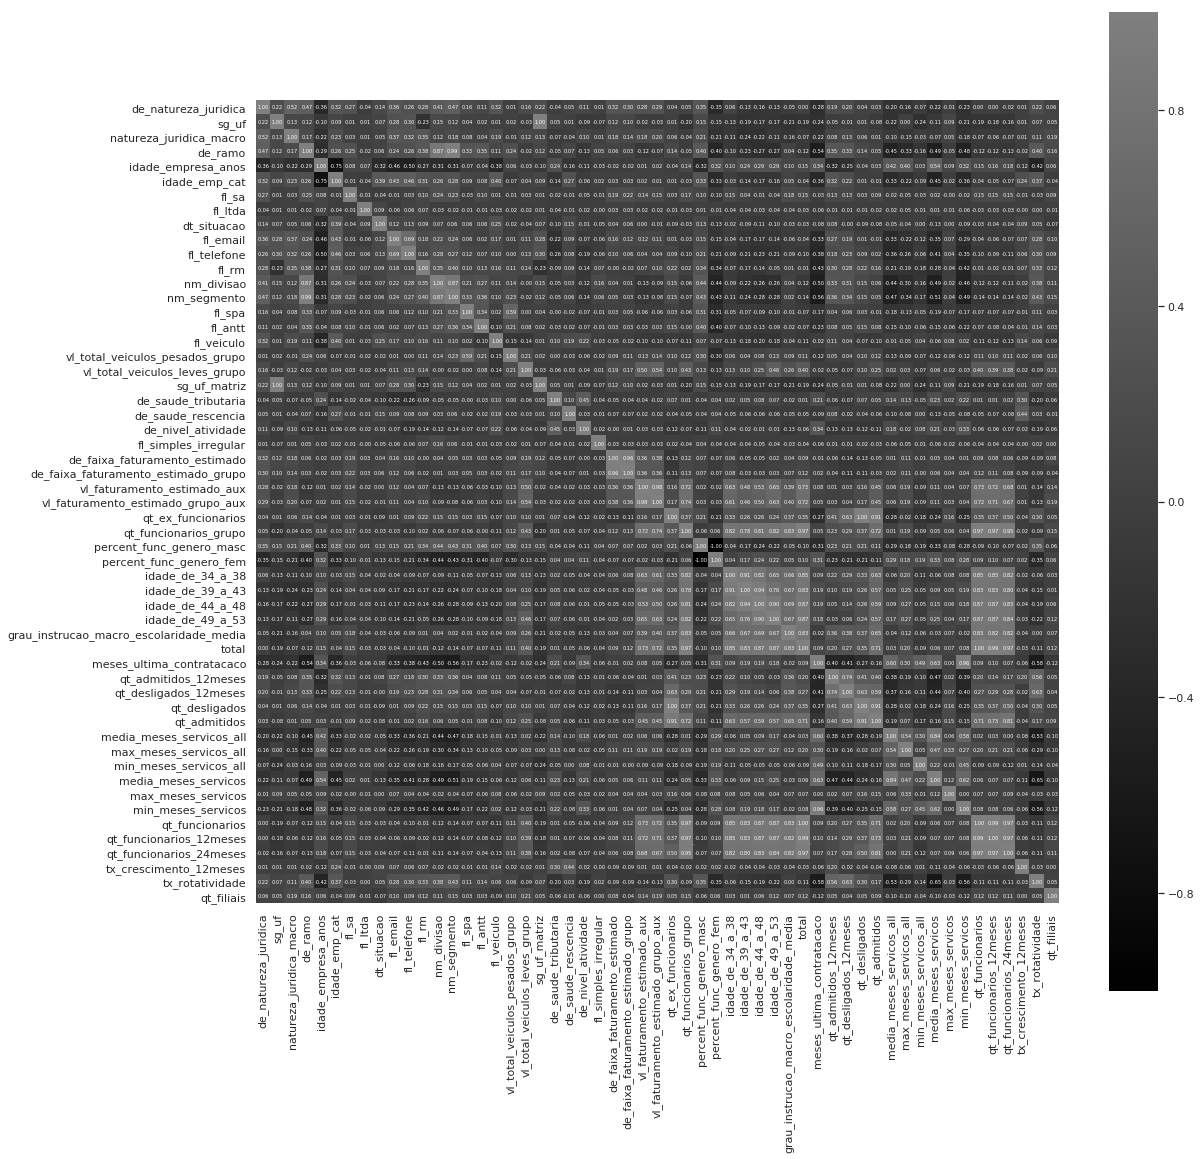

In [ ]:
cor_market_portfolio_3_T2 = portfolio_3_T2.drop(['fl_matriz','setor','fl_me', 'fl_epp', 'fl_mei', 'fl_st_especial', 'fl_passivel_iss'], axis = 1)
correlacao = cor_market_portfolio_3_T2.corr(method="pearson")
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(correlacao, center=True, square=True, annot=True, cmap="gist_gray",fmt='.2f', 
                 annot_kws={'size': 5});

>> ### Observações sobre o tipo de cliente da empresa 3:

- Os clientes disponibilizam pelo menos 63 dados (já contando com o id);
- Empresas com qualquer idade, mesmo que tenha menos de 1 ano. Porem a maioria tem mais de 20;
- Todos os clientes, sem exceção são do setor de serviço;
- Têm faturamento acima de 10 milhões;
- Natureza jurídica variada, mas maioria são municípios, empresas e órgão públicos;
- Ramos variados mas o principal é administração pública, defesa e seguridade social;
- Os dados: fl_matriz, fl_passivel_iss sempre apresentam valor “True”;
- Os dados: fl_me, fl_mei, fl_epp, fl_st_especial sempre têm valor “False”;


***